In [1]:
import os
import sys
sys.path.append('../train/')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from util import array2mat, mat2array

/home/liminghong/miniconda3/envs/see/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_by_cell_type(eval_set, preds, cell_type, gene_name):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if cell_type and eval_set[i]['cell_type'] != cell_type:
            continue
        pred['predict'][pred['predict']<0] = 0
        num += 1
        if _pred is None:
            _pred = pred['predict'].copy()
            _target = eval_set[i]['scHiC'][gene_name].copy().astype(float)
        else:
            _pred += pred['predict']
            _target += eval_set[i]['scHiC'][gene_name].copy().astype(float)
    return _pred/num, _target/num

In [3]:
def _draw(mats, file_path=None):
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

    for index, cell_type in enumerate(["Astro", "Endo", "ODC", "OPC"]):
        sns.heatmap(mats[cell_type]["target"], cmap='Reds_r', square=True, ax=axs[0, index])
        axs[0, index].set_title("{}\ntarget".format(cell_type))
        sns.heatmap(mats[cell_type]["predict"], cmap='Reds_r', square=True, ax=axs[1, index])
        axs[1, index].set_title("predict")

    plt.tight_layout()
    if file_path:
        plt.savefig(file_path, bbox_inches='tight')
    plt.show()

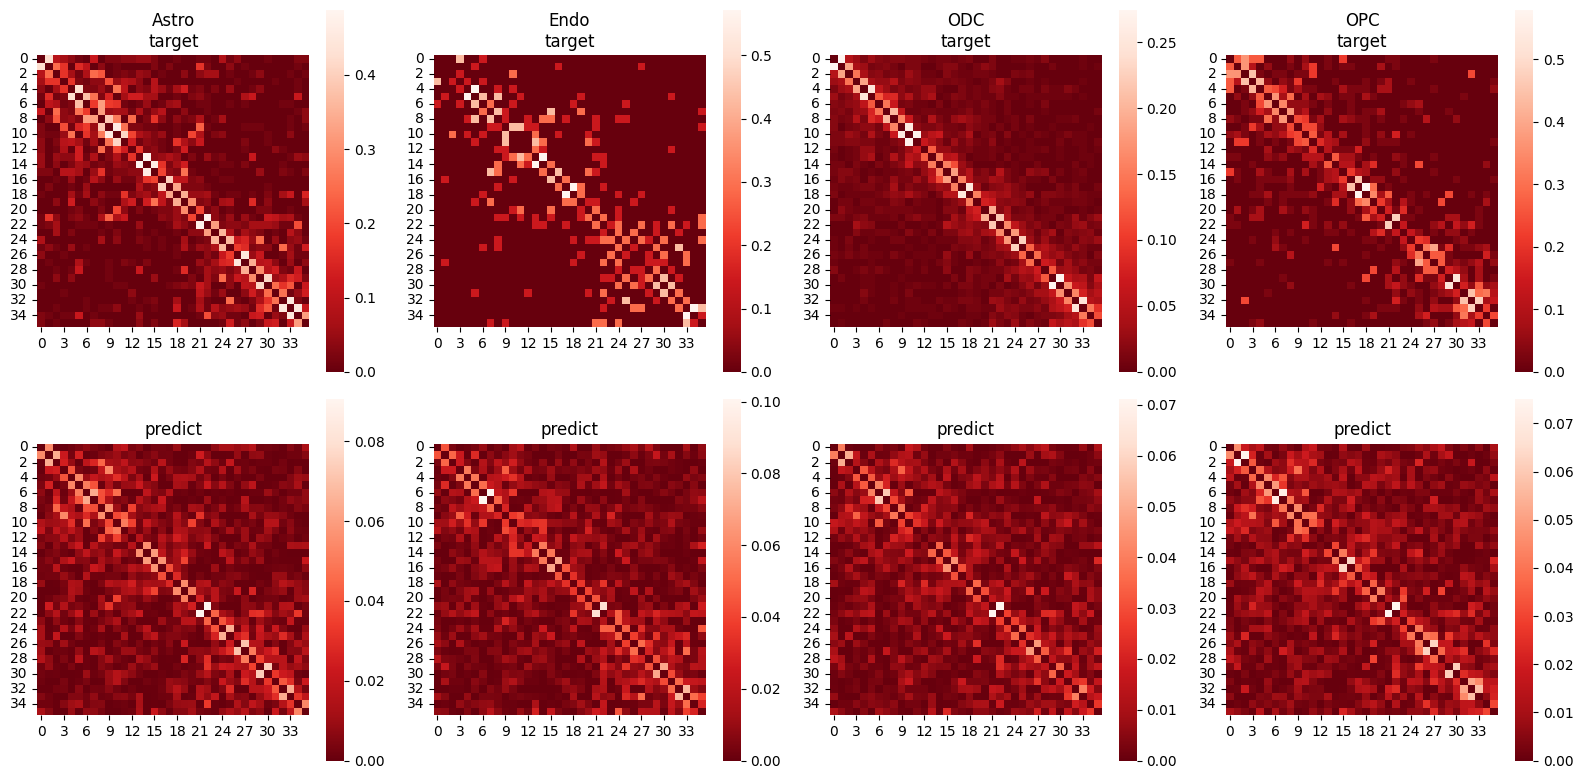

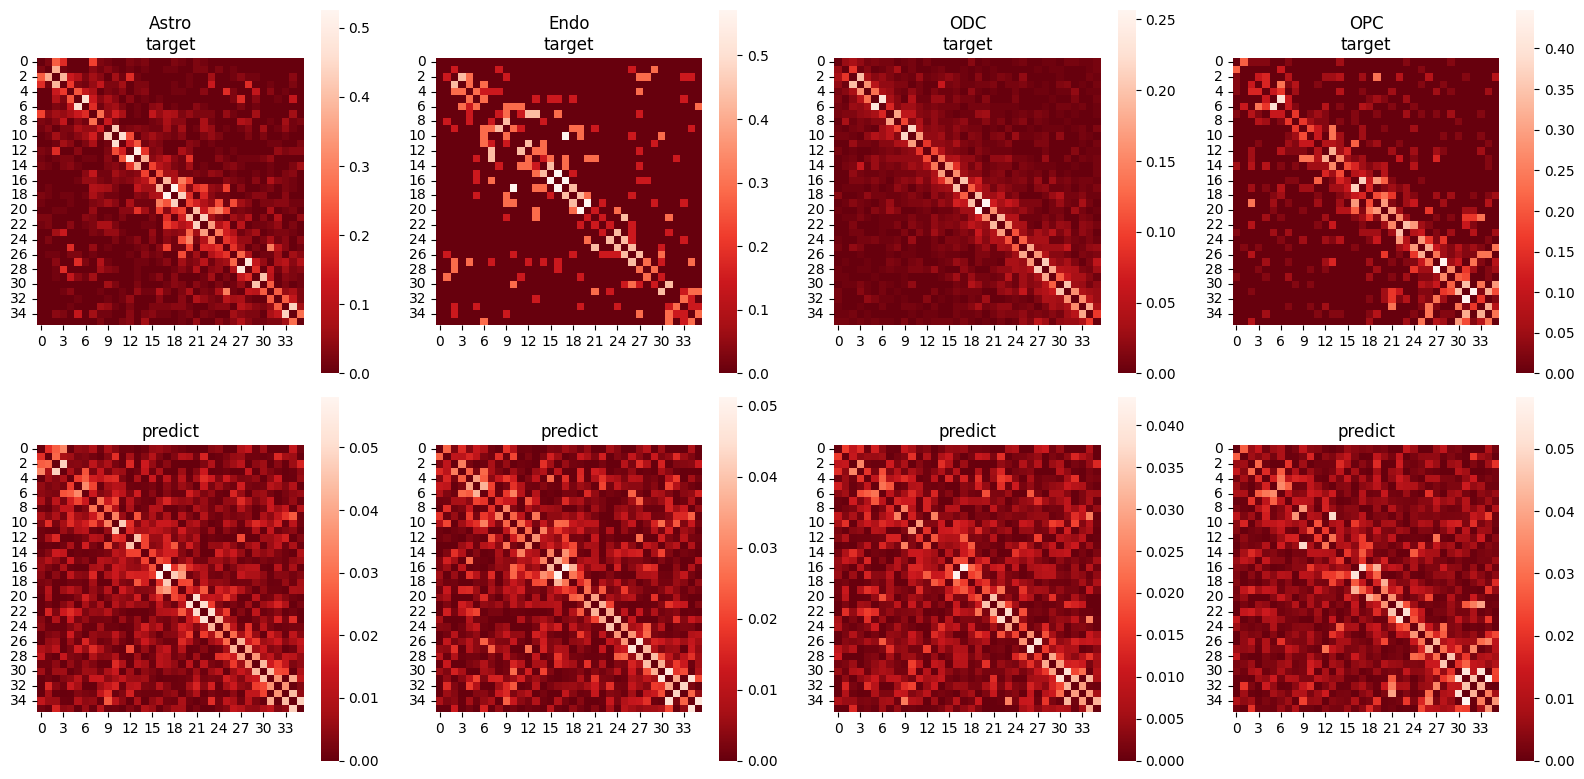

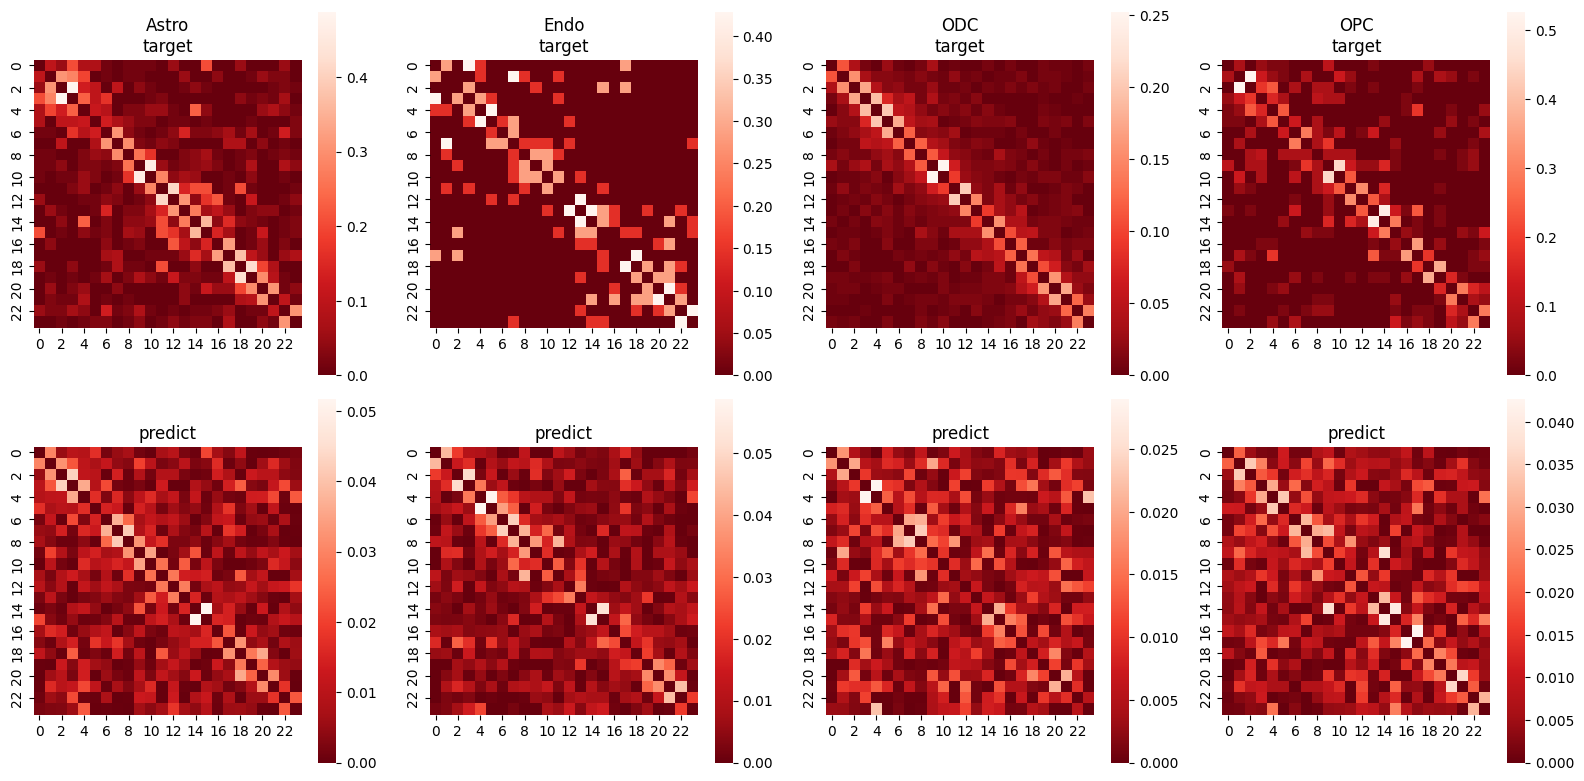

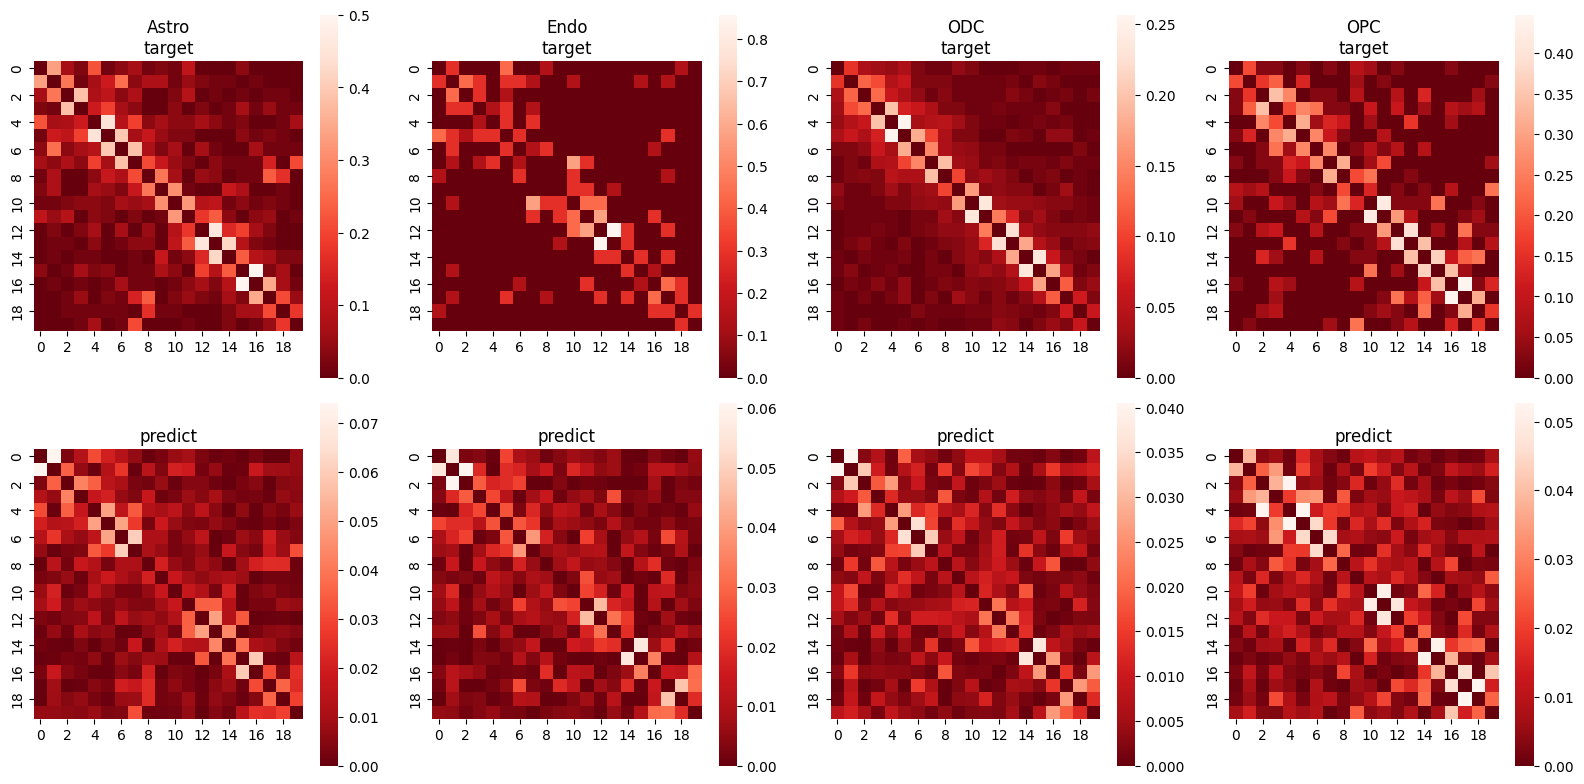

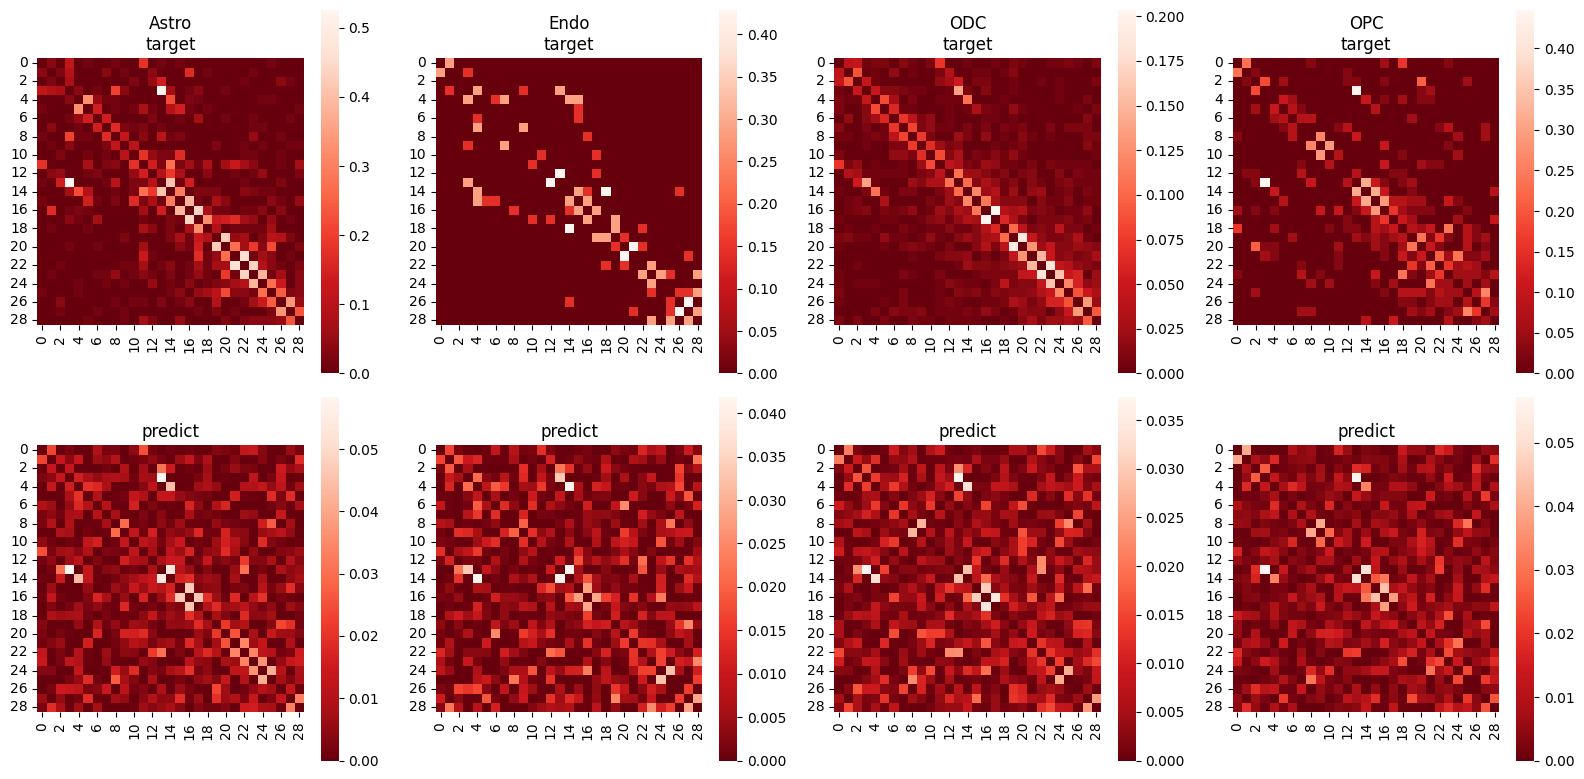

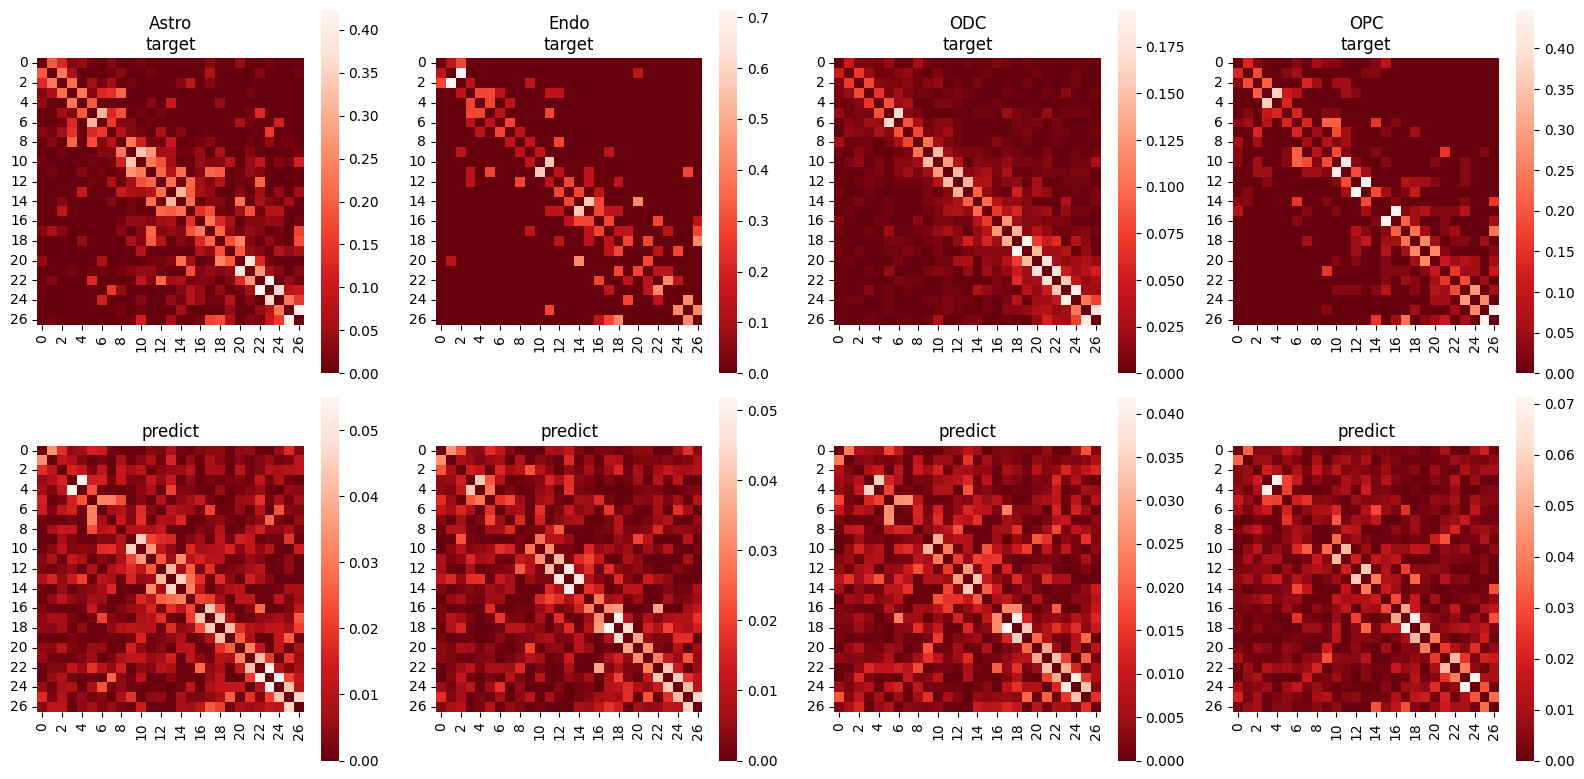

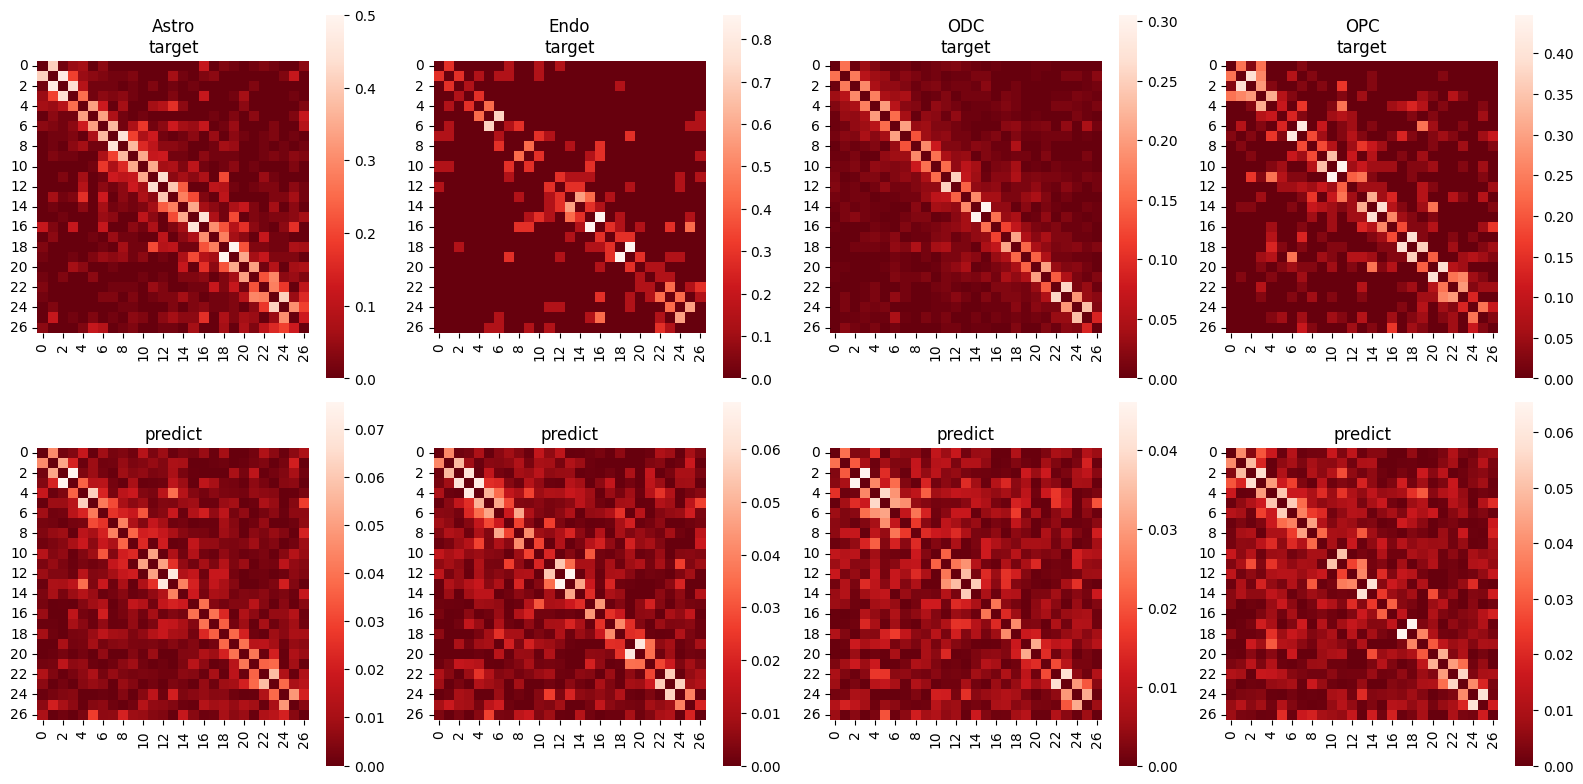

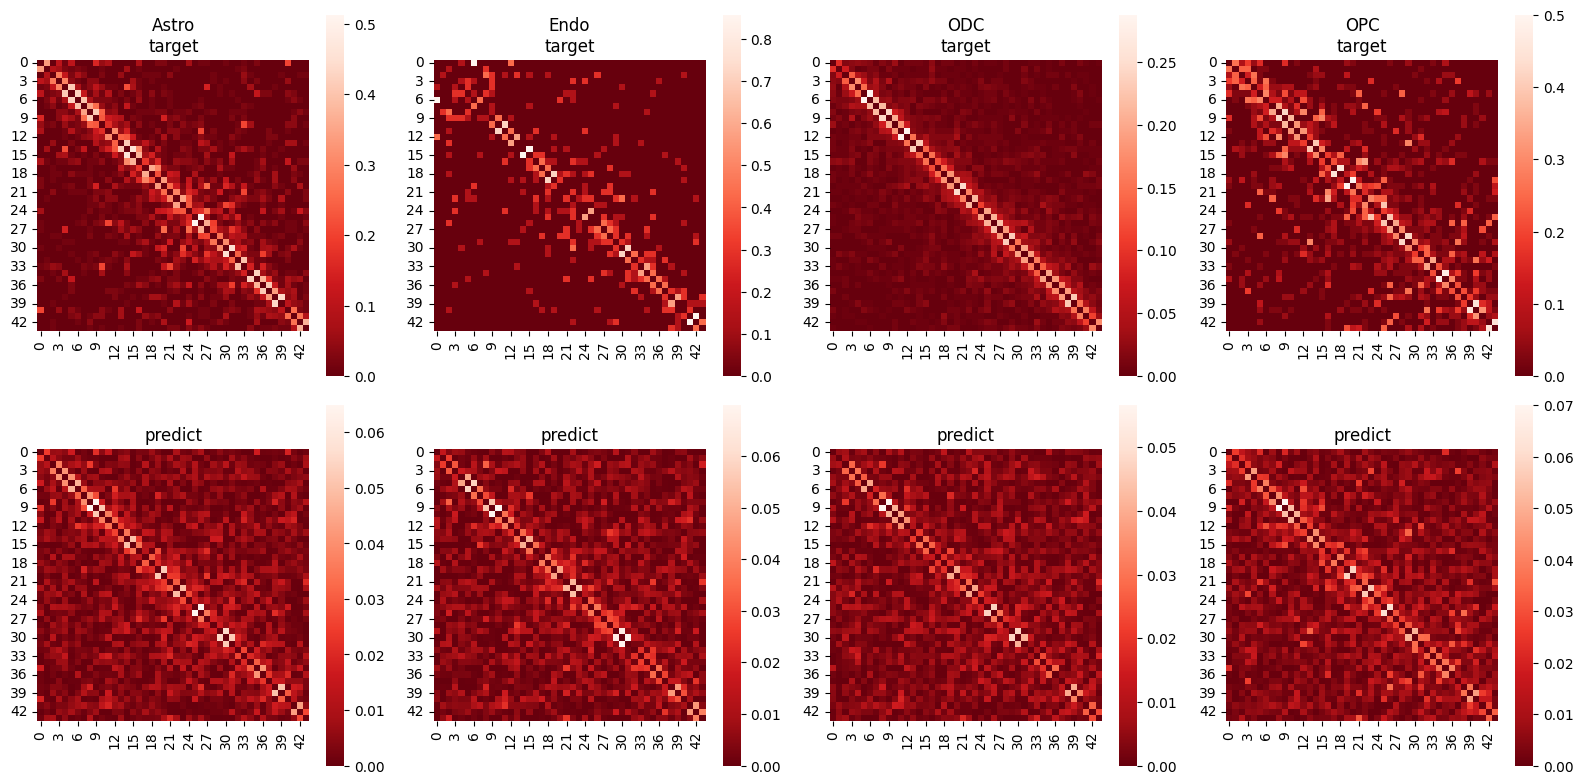

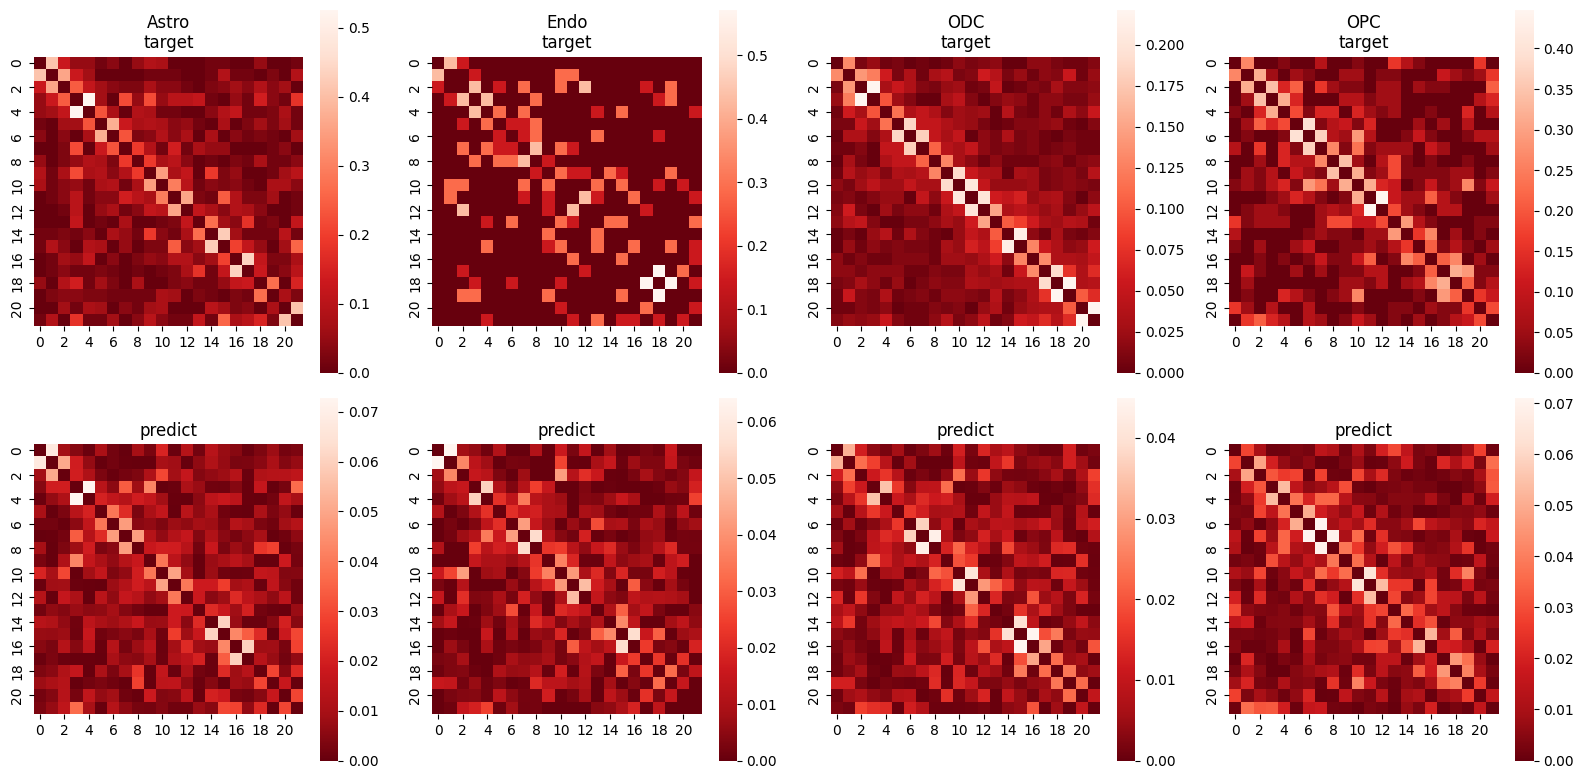

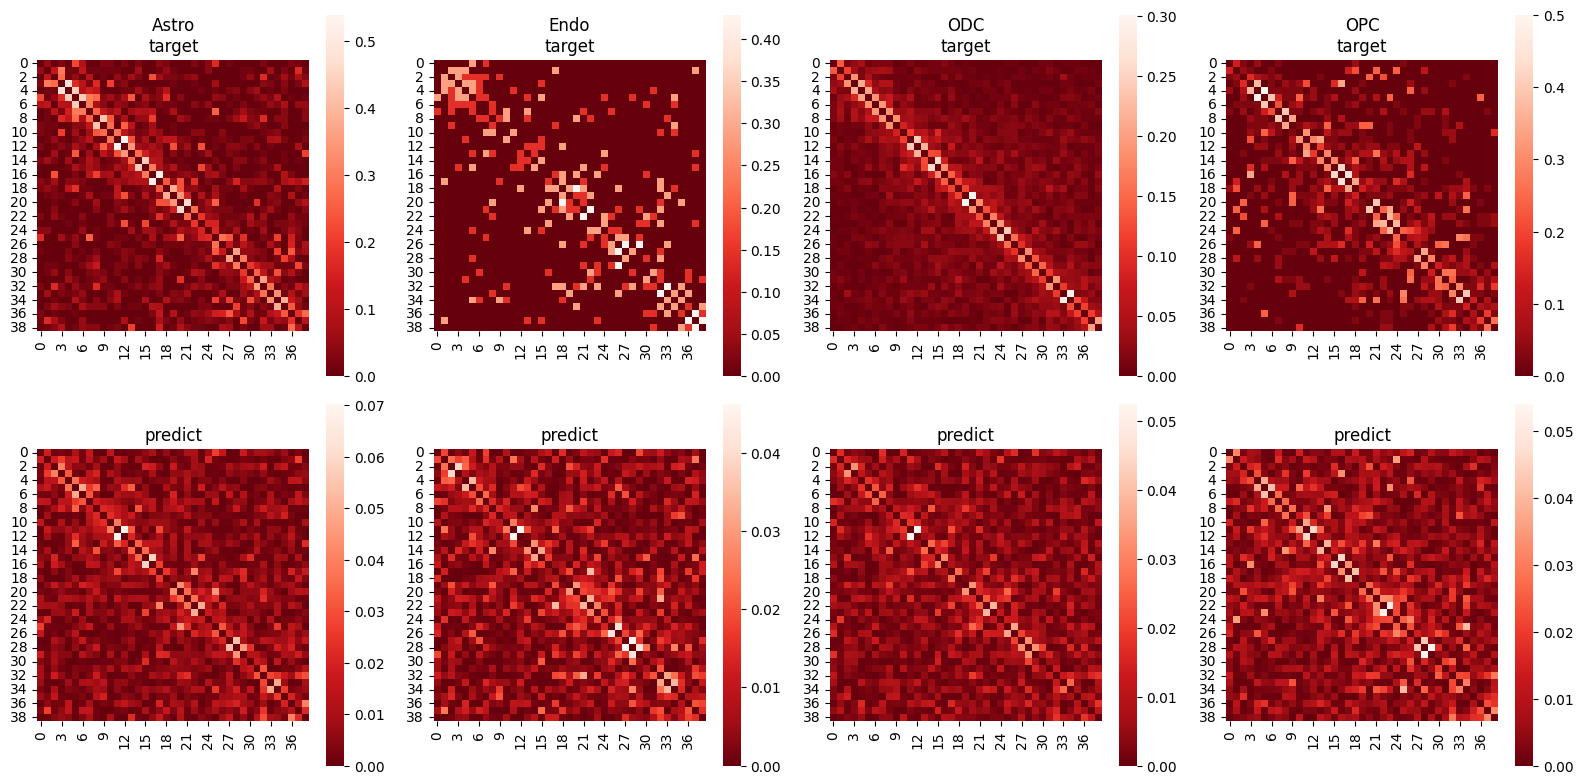

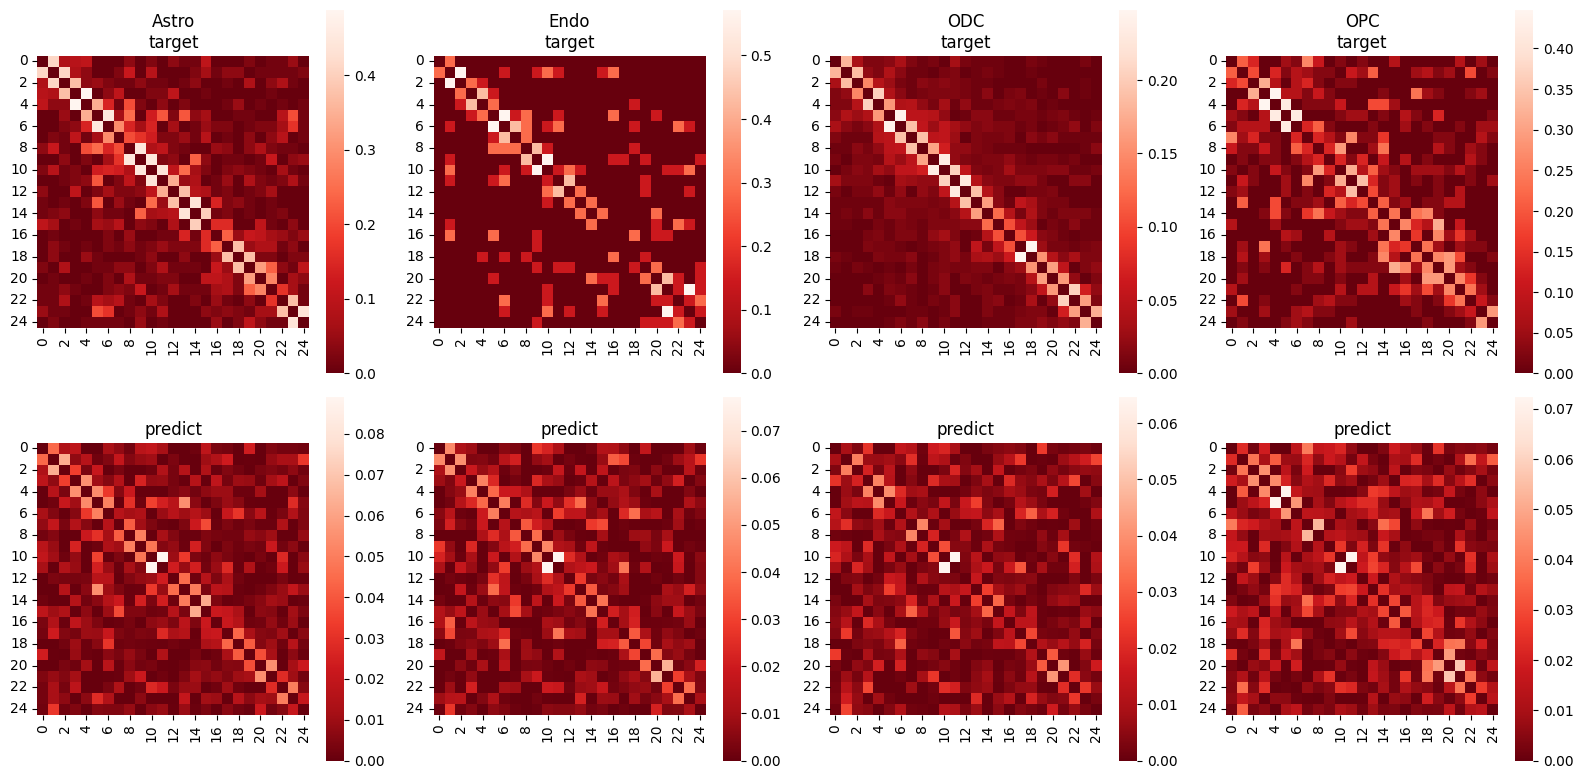

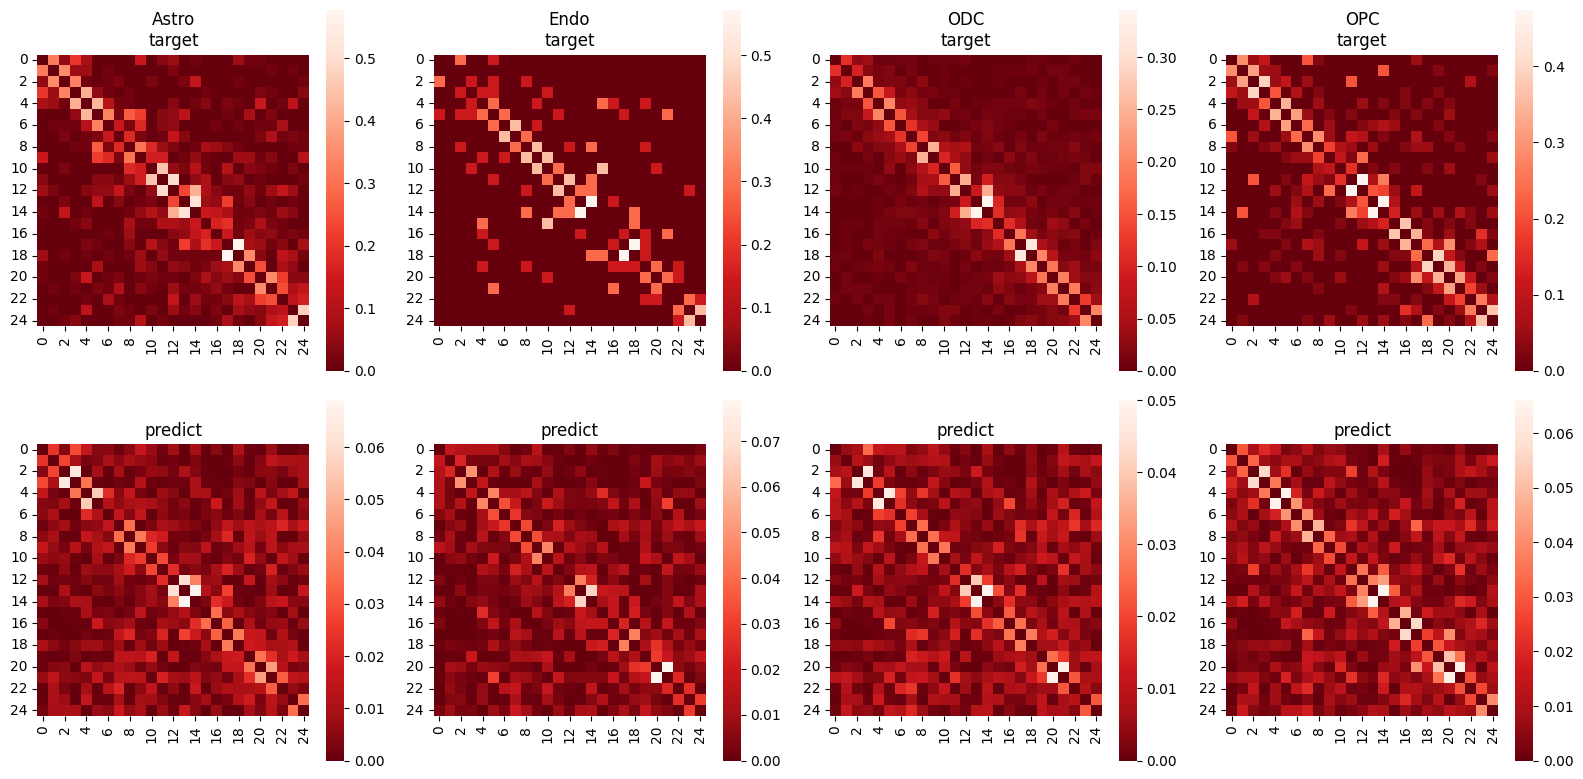

In [4]:
dir_path = "/data/liminghong/sclab/sclab/random_test/tmp"
eval_set = np.load('/data/liminghong/sclab/sclab/random_test/eval_dataset.npy', allow_pickle=True)
result, pvalues = pd.DataFrame(), pd.DataFrame()
for root, dirs, files in os.walk(dir_path):
    for directory in dirs:
        preds = np.load(os.path.join(root, directory, "evaluate.npy"), allow_pickle=True)

        _mats = {}
        for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
            _pred, _target = show_by_cell_type(eval_set, preds, cell_type, directory)
            _pred, _target = array2mat(_pred), array2mat(_target)
            np.fill_diagonal(_pred, 0)
            np.fill_diagonal(_target, 0)

            _mats[cell_type] = {"target": _target, "predict": _pred}
        _draw(_mats, "../docs/source/_static/genomewide_evaluations/domain/{}.png".format(directory))

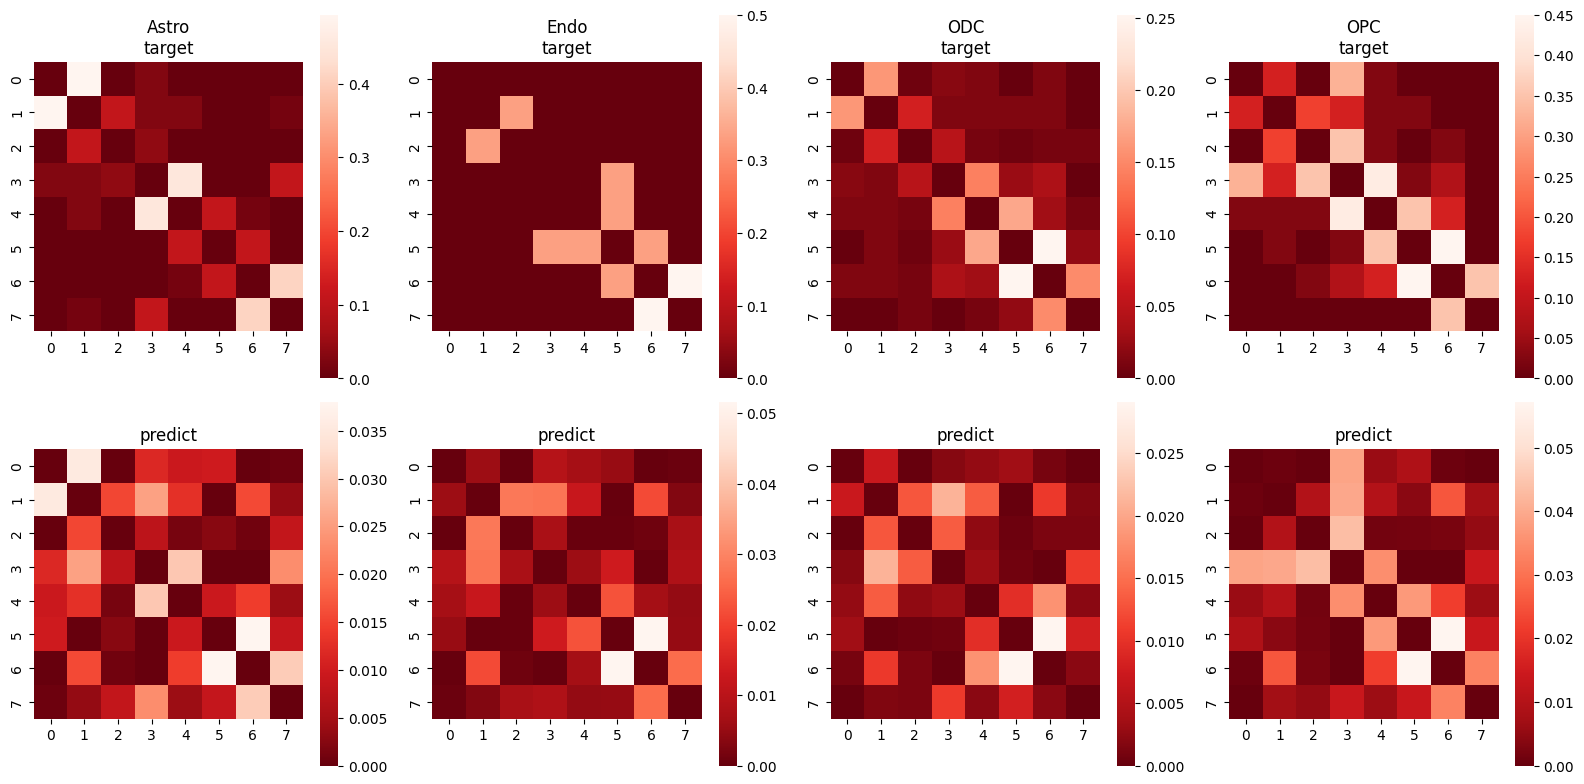

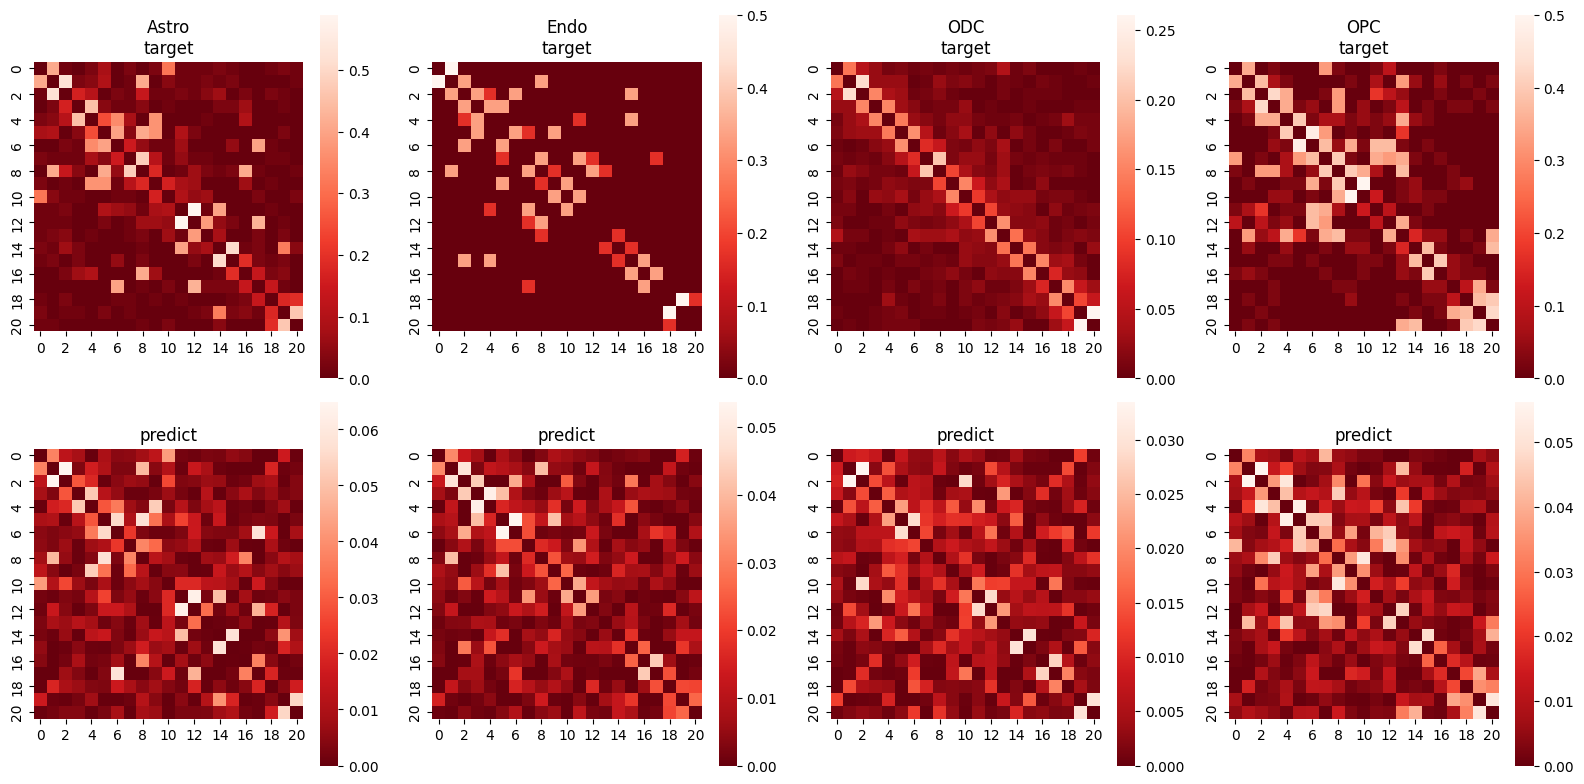

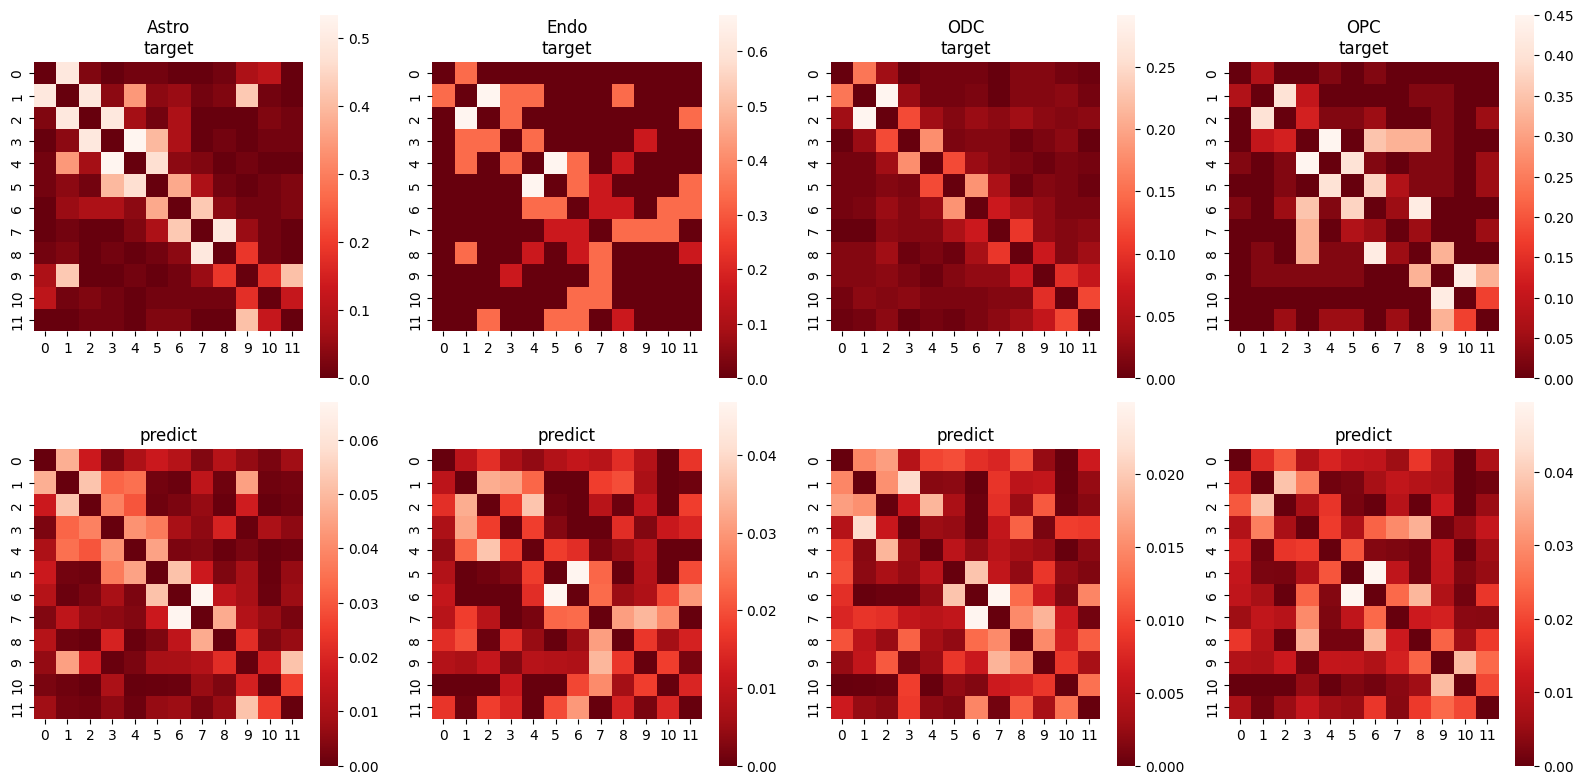

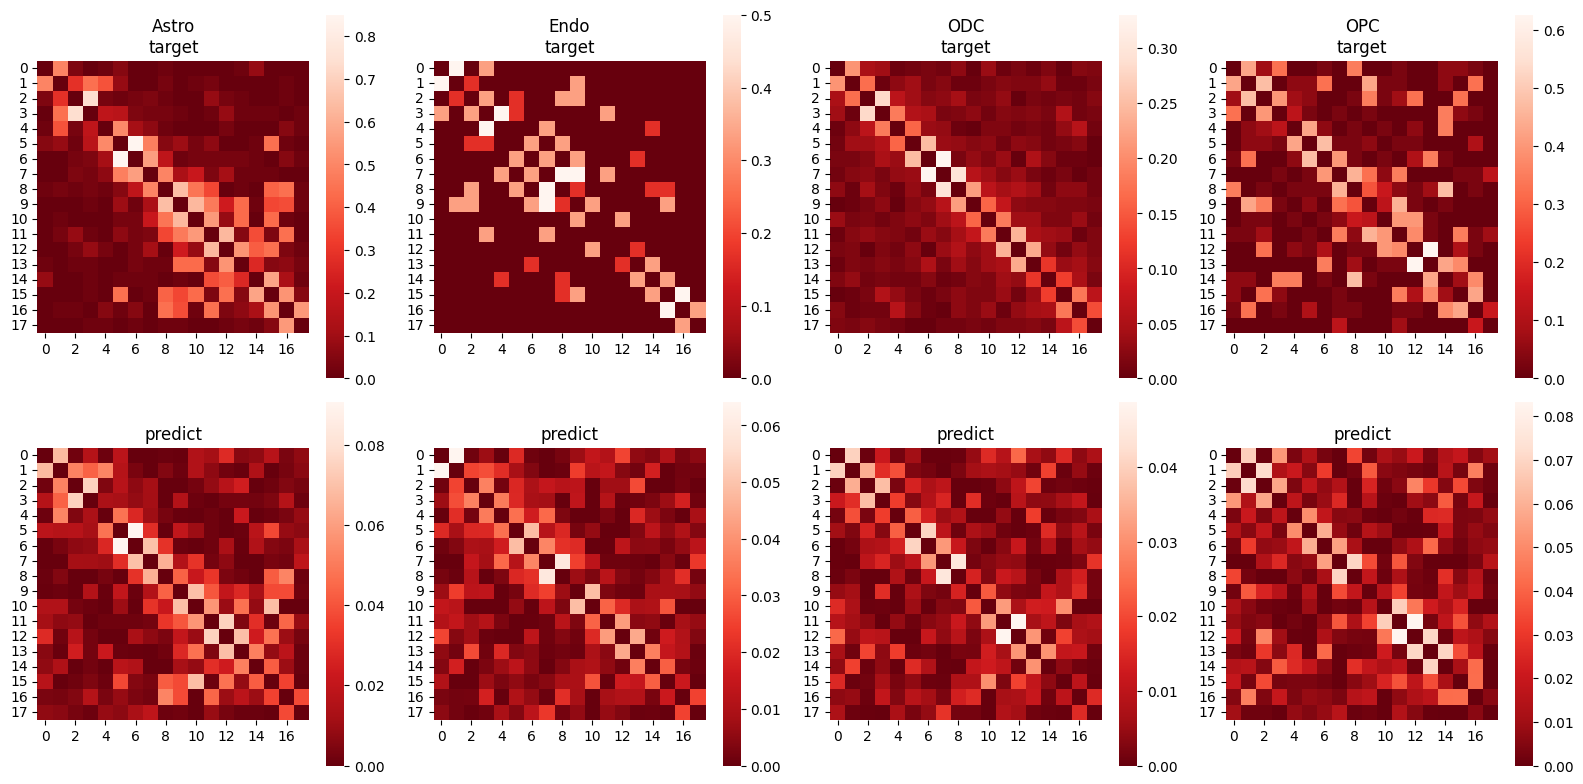

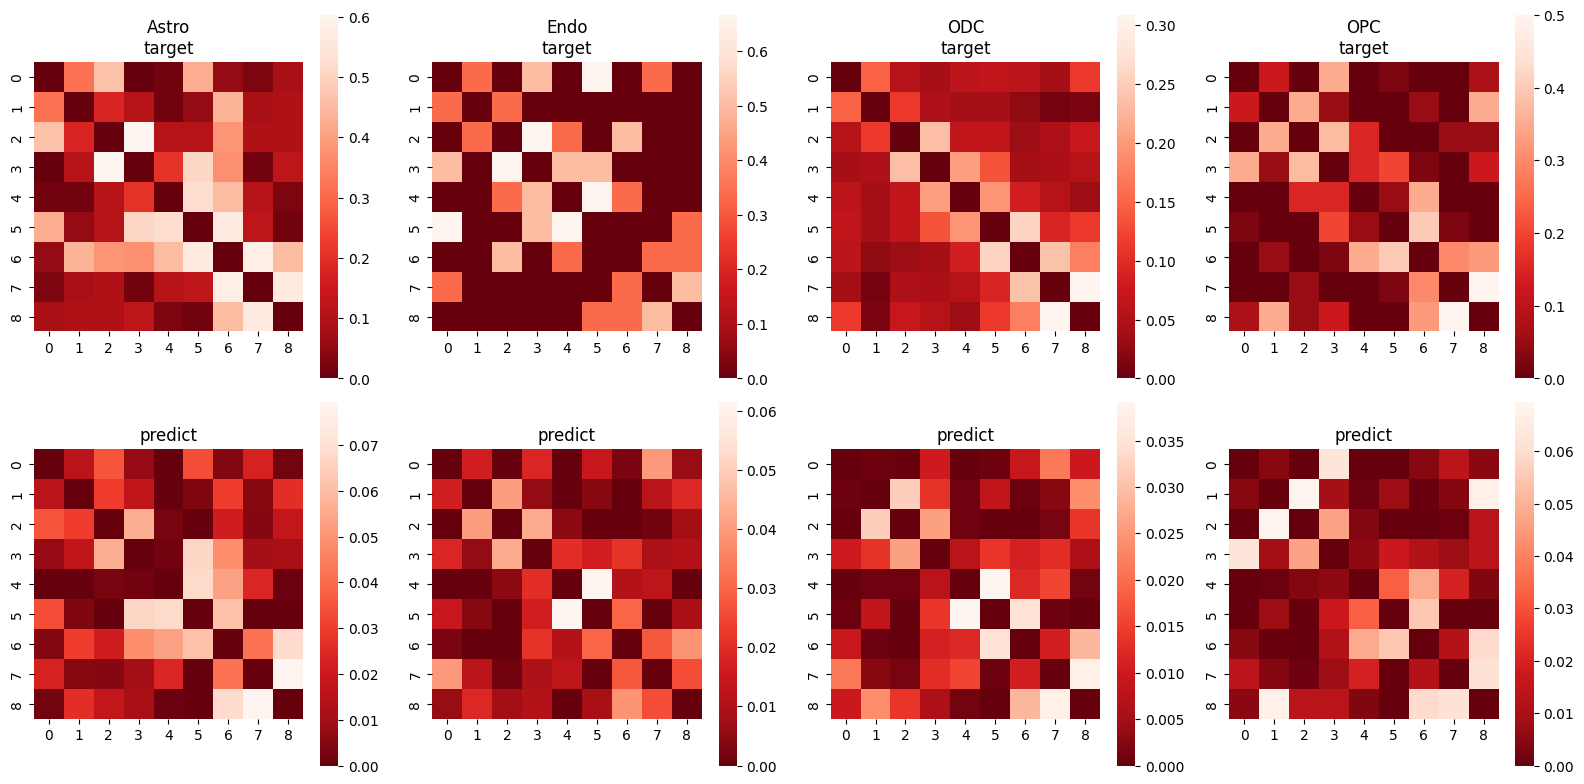

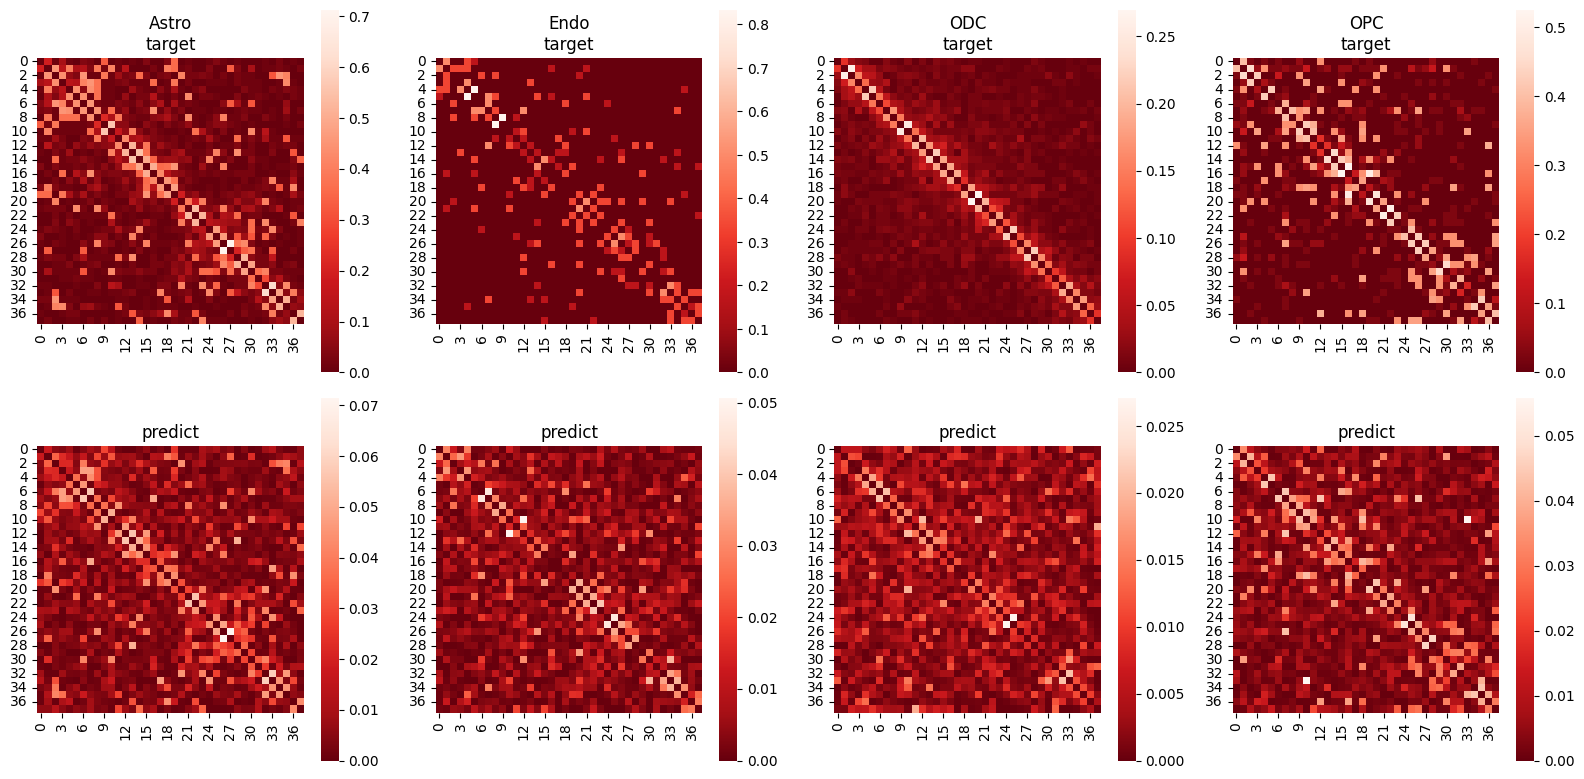

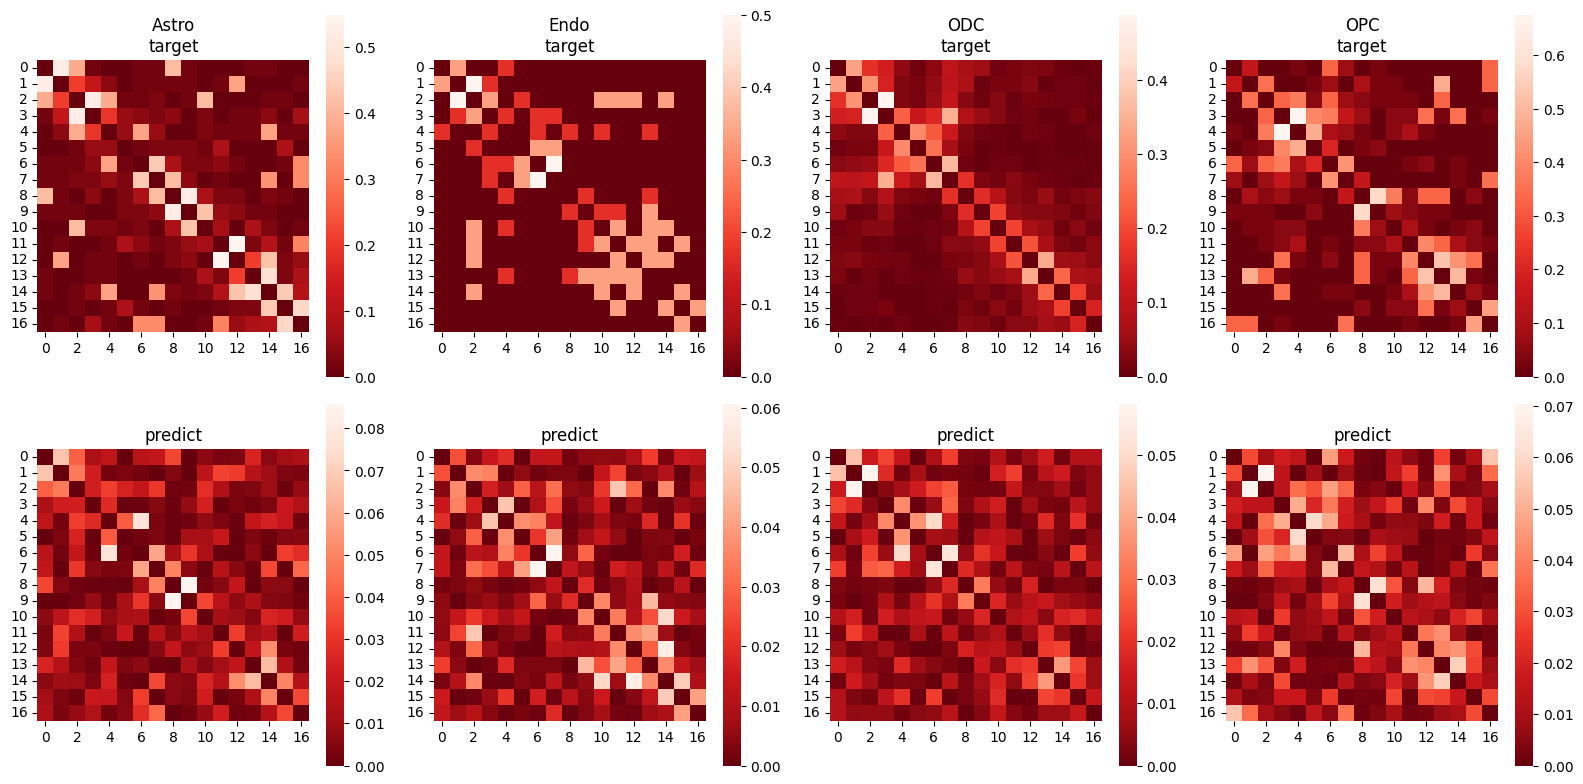

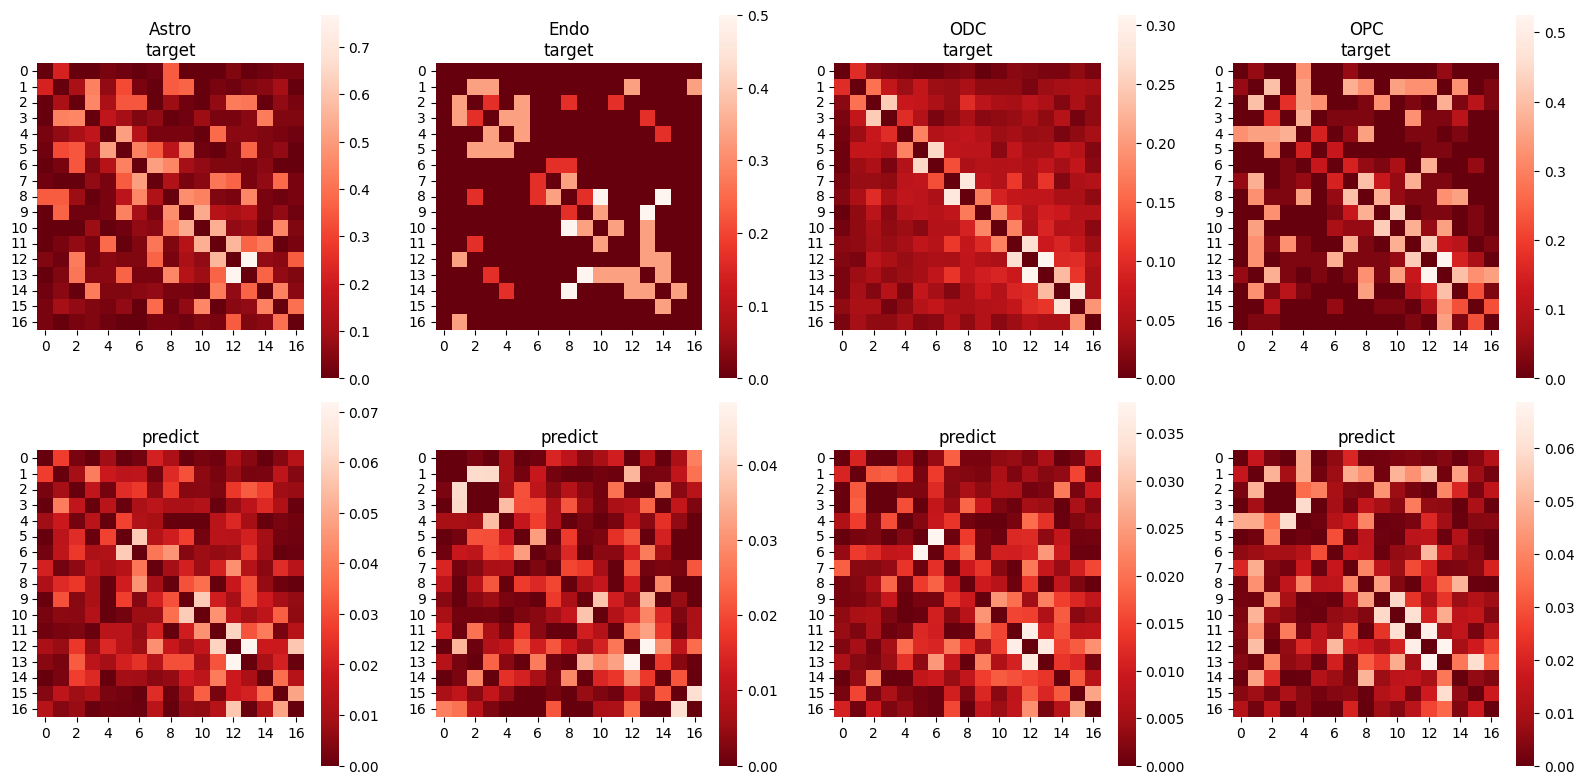

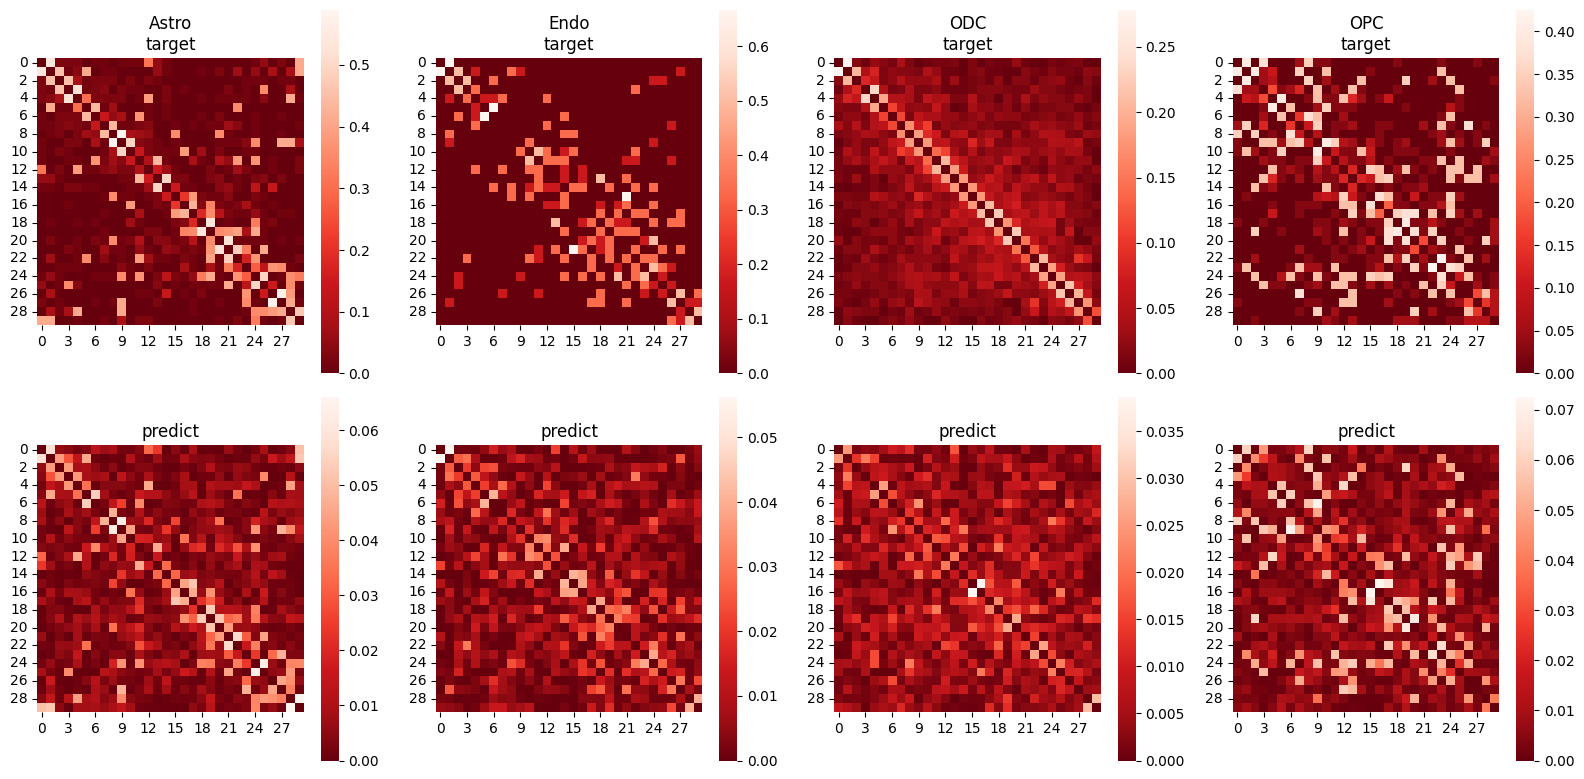

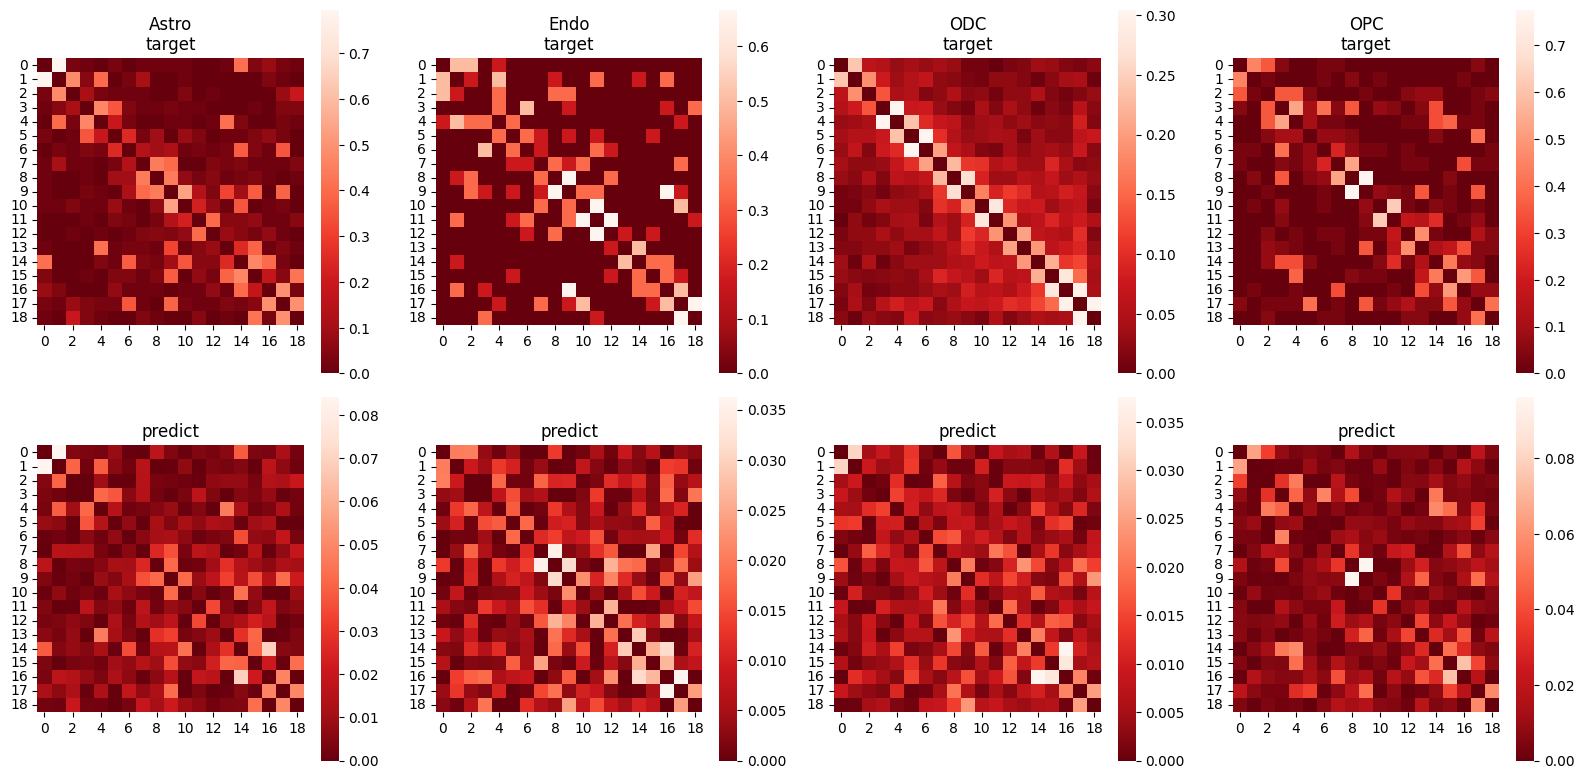

In [5]:
eval_set = np.load('/data/liminghong/sclab/sclab/eval_dataset.npy', allow_pickle=True)
result, pvalues = pd.DataFrame(), pd.DataFrame()
for gene_name in [
    "PDGFRA", "PTPRZ1", "VCAN",  # OPC
    "SLC1A2", "SLC1A3", "GPM6A",  # Astro
    "MBP", "QKI", "DOCK10", "PIP4K2A",  # ODC
]:
    preds = np.load(os.path.join("/data/liminghong/sclab/sclab/tmp", gene_name, "evaluate.npy"), allow_pickle=True)

    _mats = {}
    for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
        _pred, _target = show_by_cell_type(eval_set, preds, cell_type, gene_name)
        _pred, _target = array2mat(_pred), array2mat(_target)
        np.fill_diagonal(_pred, 0)
        np.fill_diagonal(_target, 0)

        _mats[cell_type] = {"target": _target, "predict": _pred}
    _draw(_mats, "../docs/source/_static/genomewide_evaluations/marker_gene/{}.png".format(gene_name))

In [6]:
v19_anno = pd.read_csv('/data/liminghong/sclab/public/gencode.v19.annotation.gtf',
                       header=None, sep='\t', skiprows=[i for i in range(5)], usecols=[0, 2, 3, 4, 6, 8], names=[
                           'chrom', 'type', 'start', 'end', 'strand', 'info'
                       ])
v19_anno['gene_name'] = v19_anno['info'].str.extract(r'(gene_name ")(\w*)')[1]
v19_anno['transcript_name'] = v19_anno['info'].str.extract(r'(transcript_name ")(\S*)(")')[1]
v19_anno['location'] = v19_anno['chrom'] + '_' + v19_anno['start'].astype(str) + '_' + v19_anno['end'].astype(str)

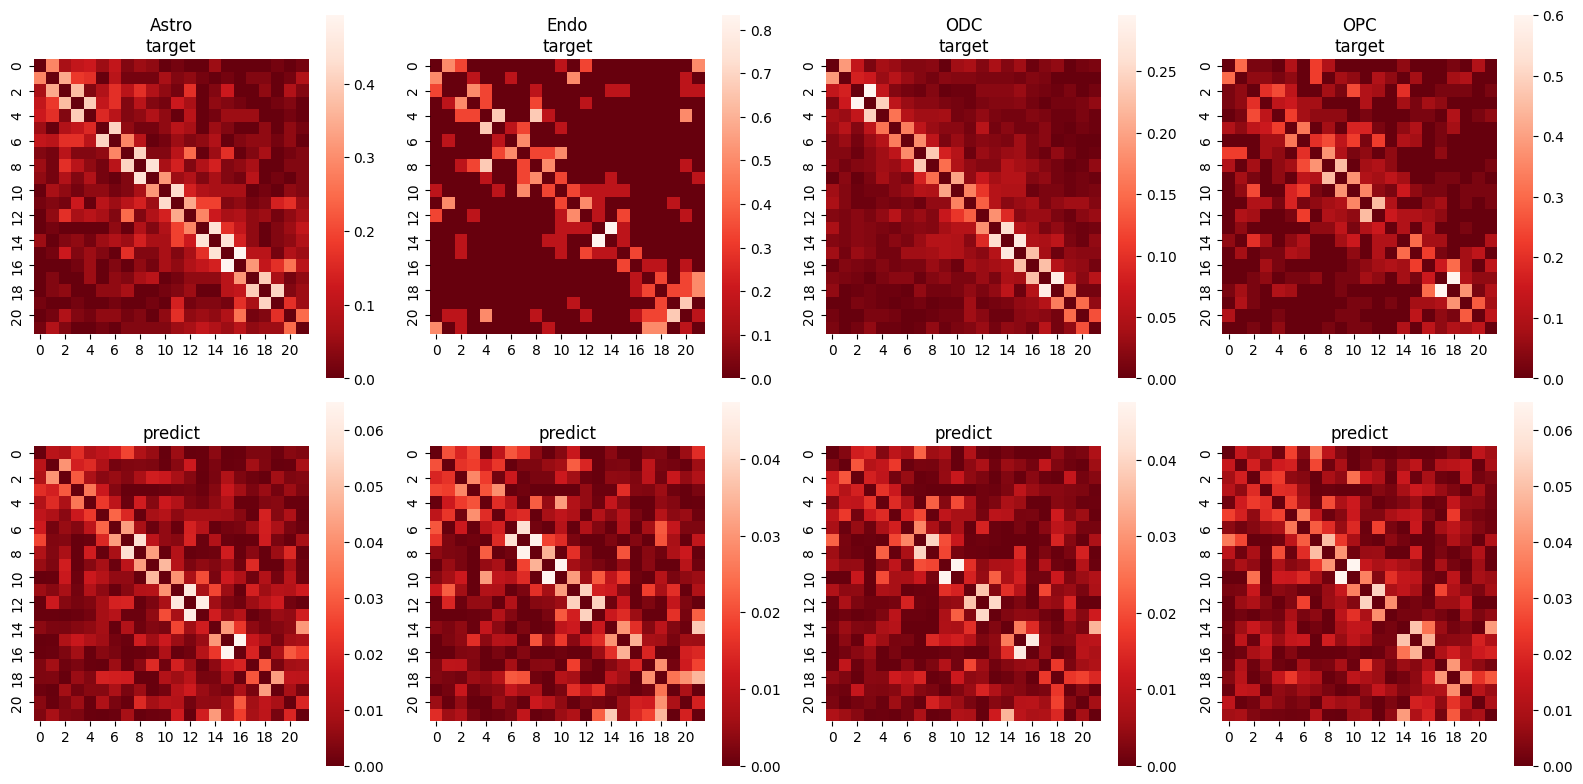

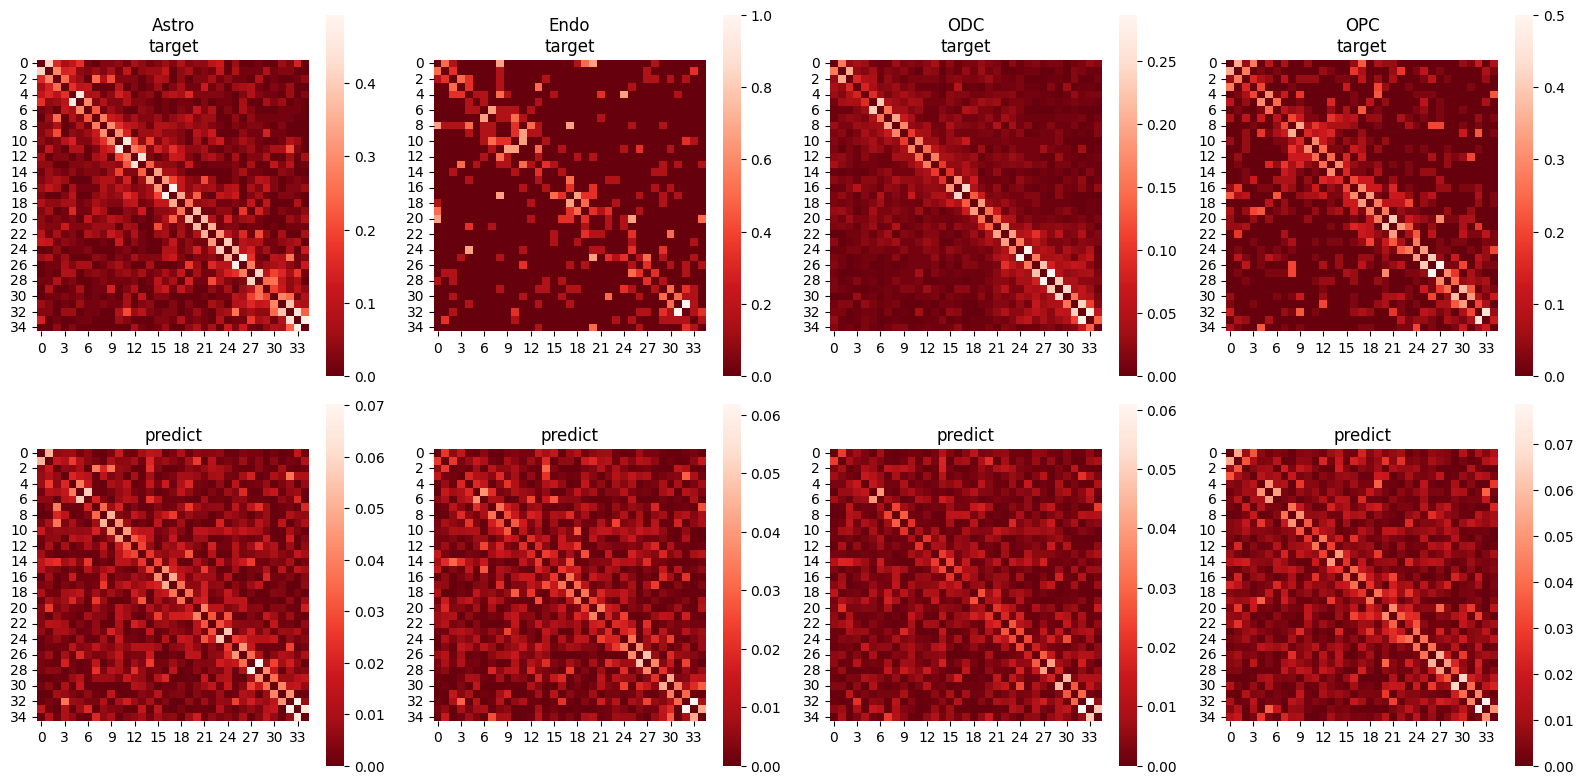

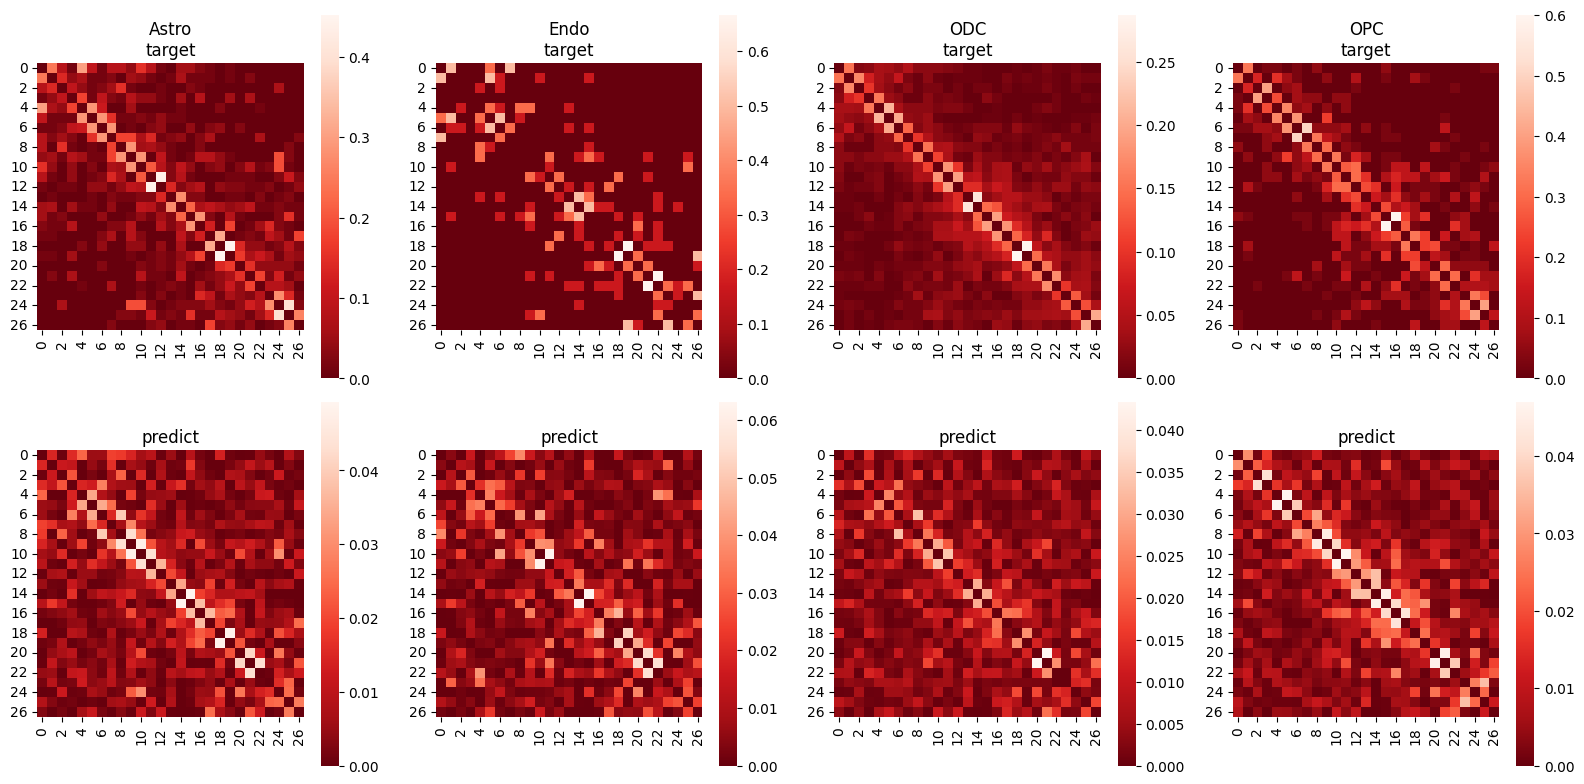

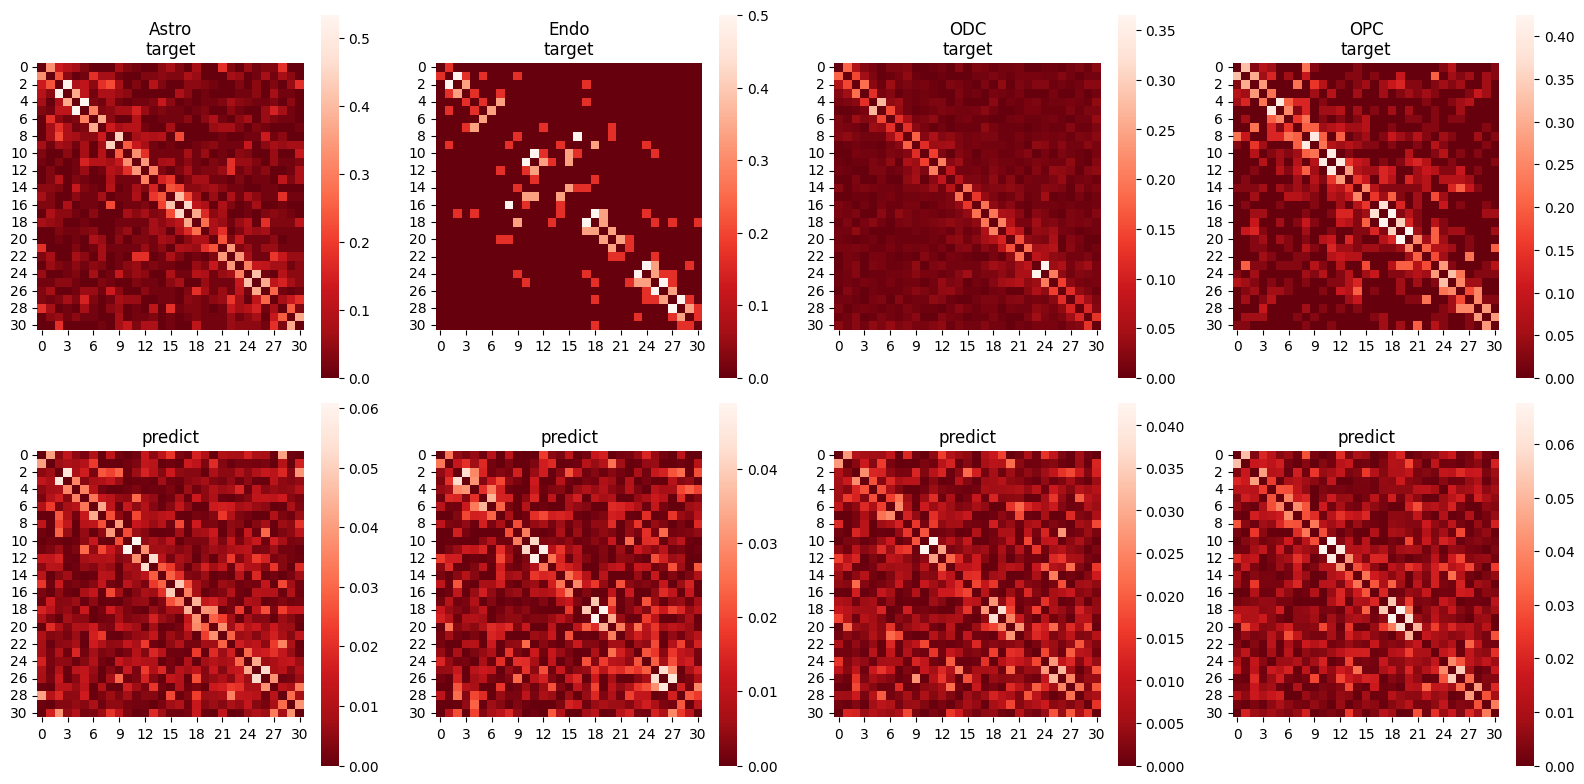

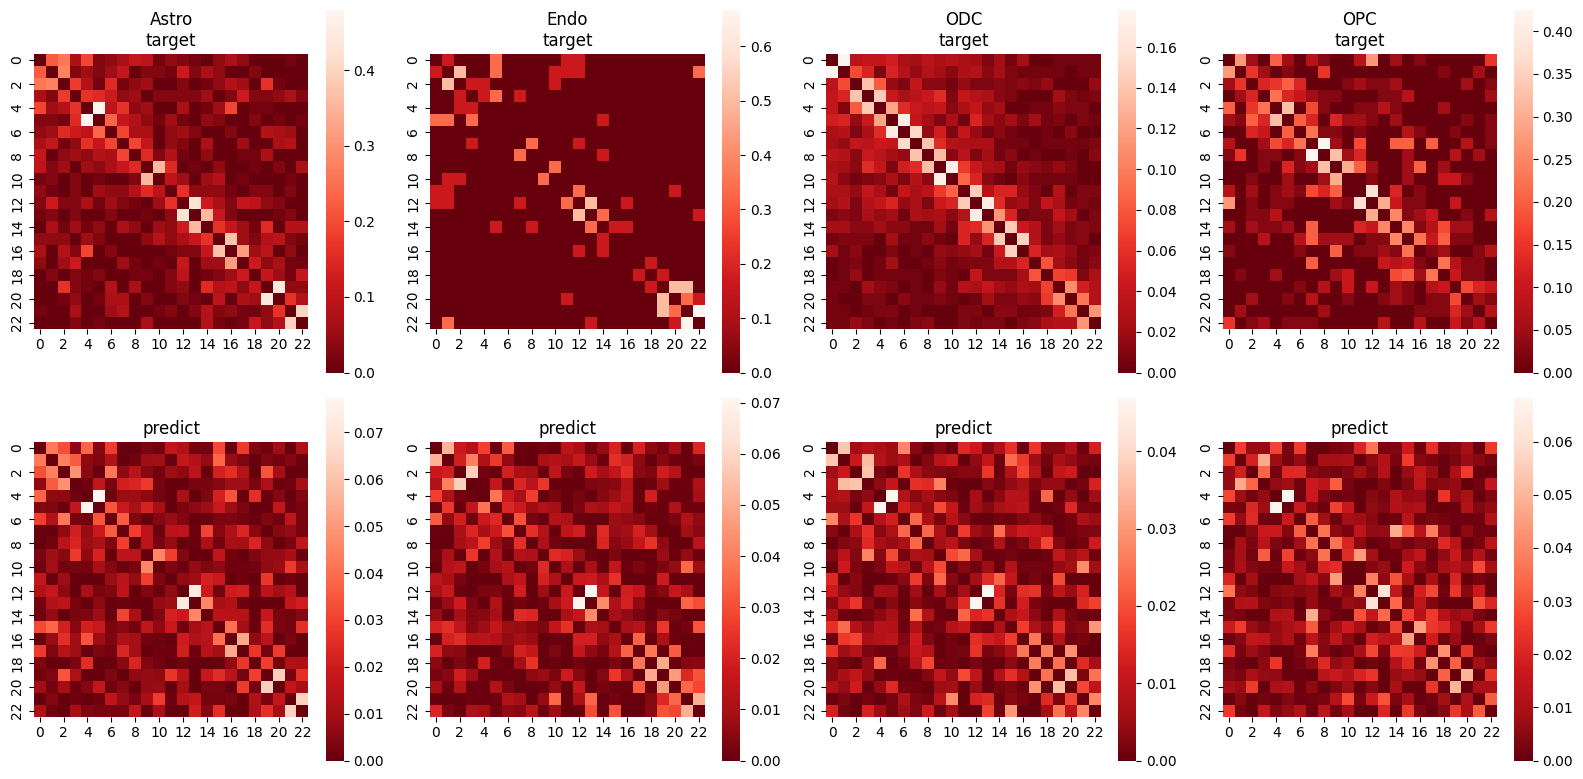

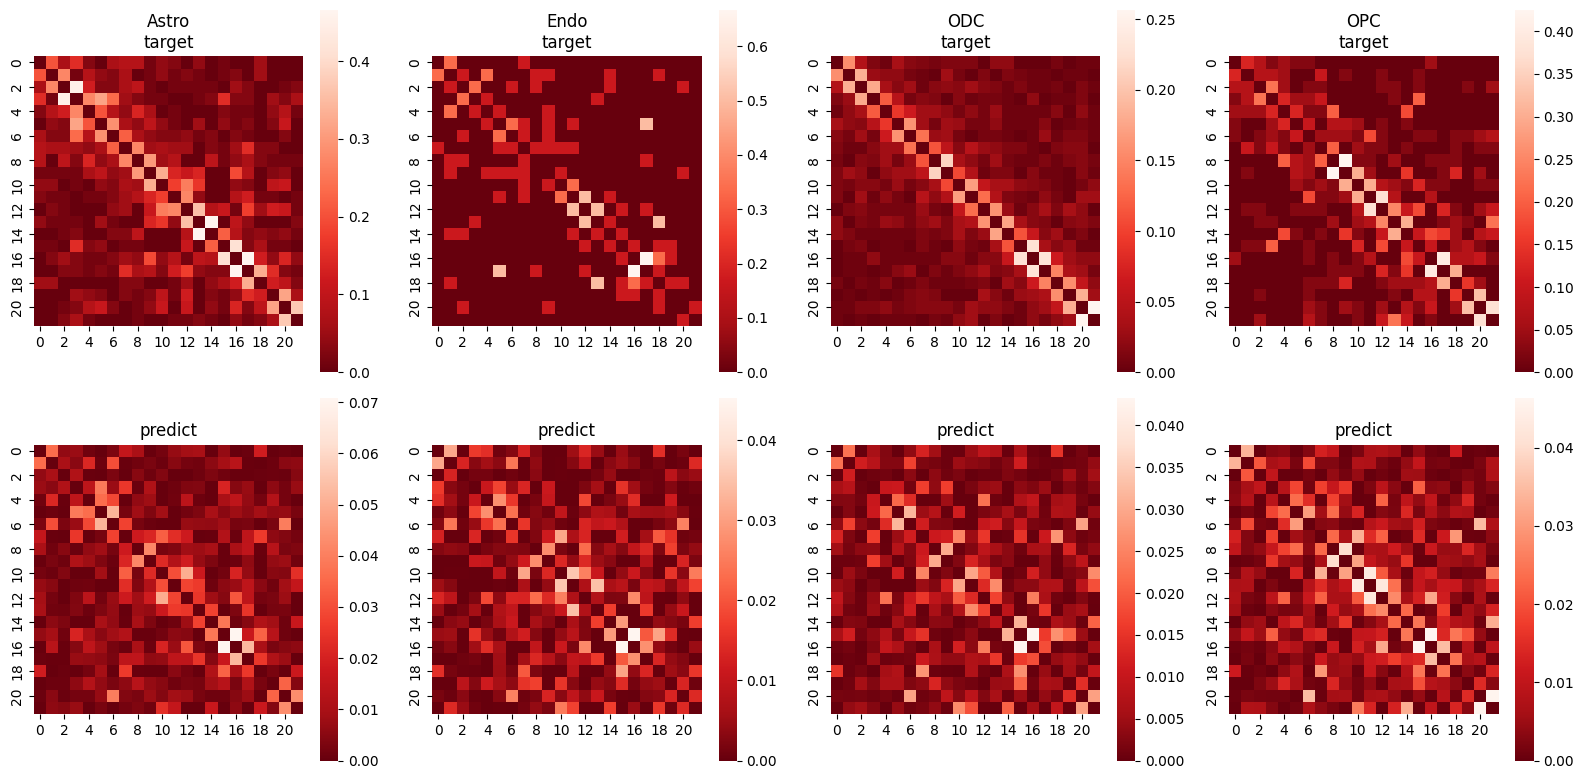

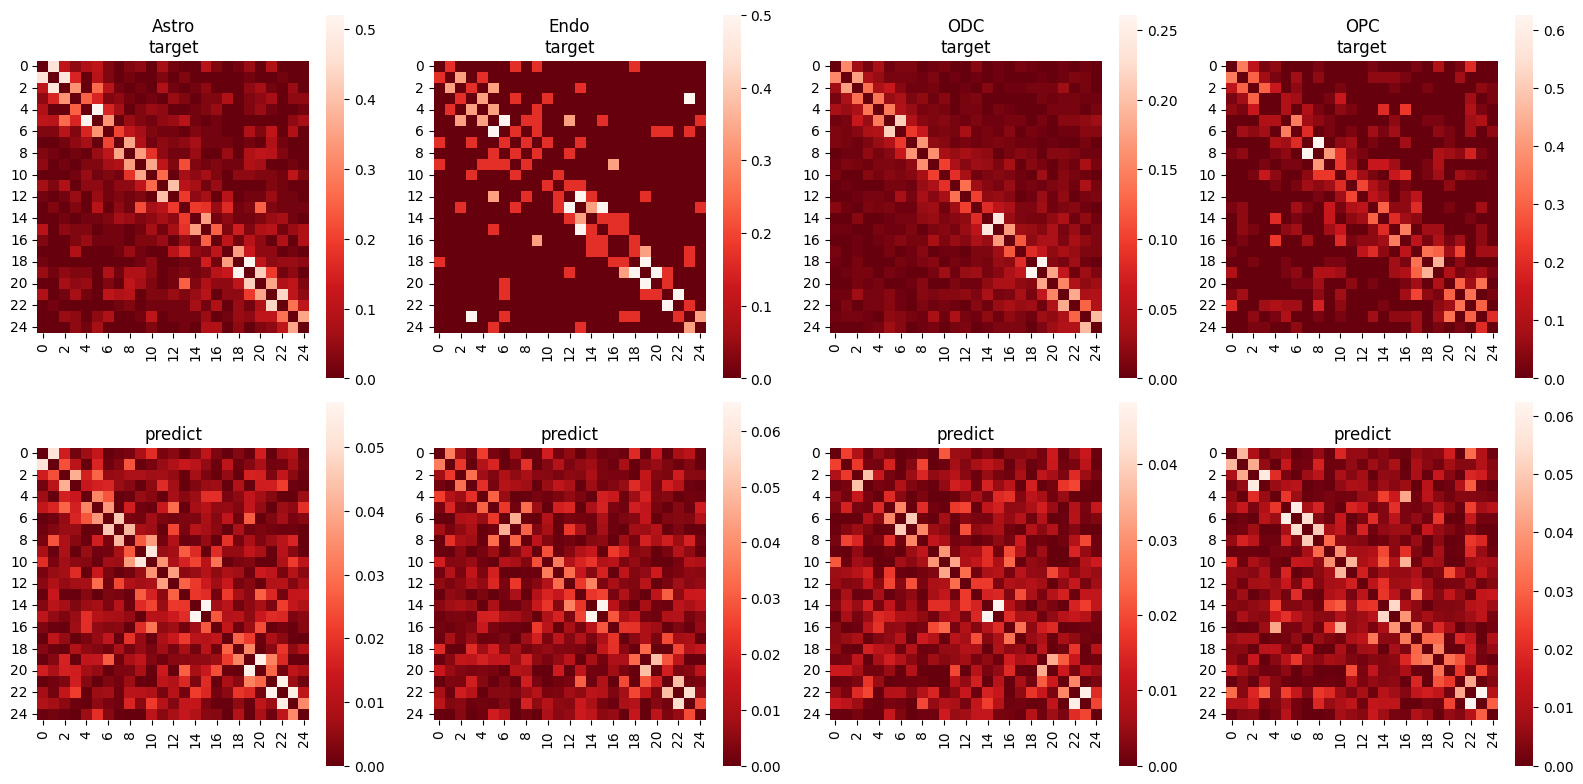

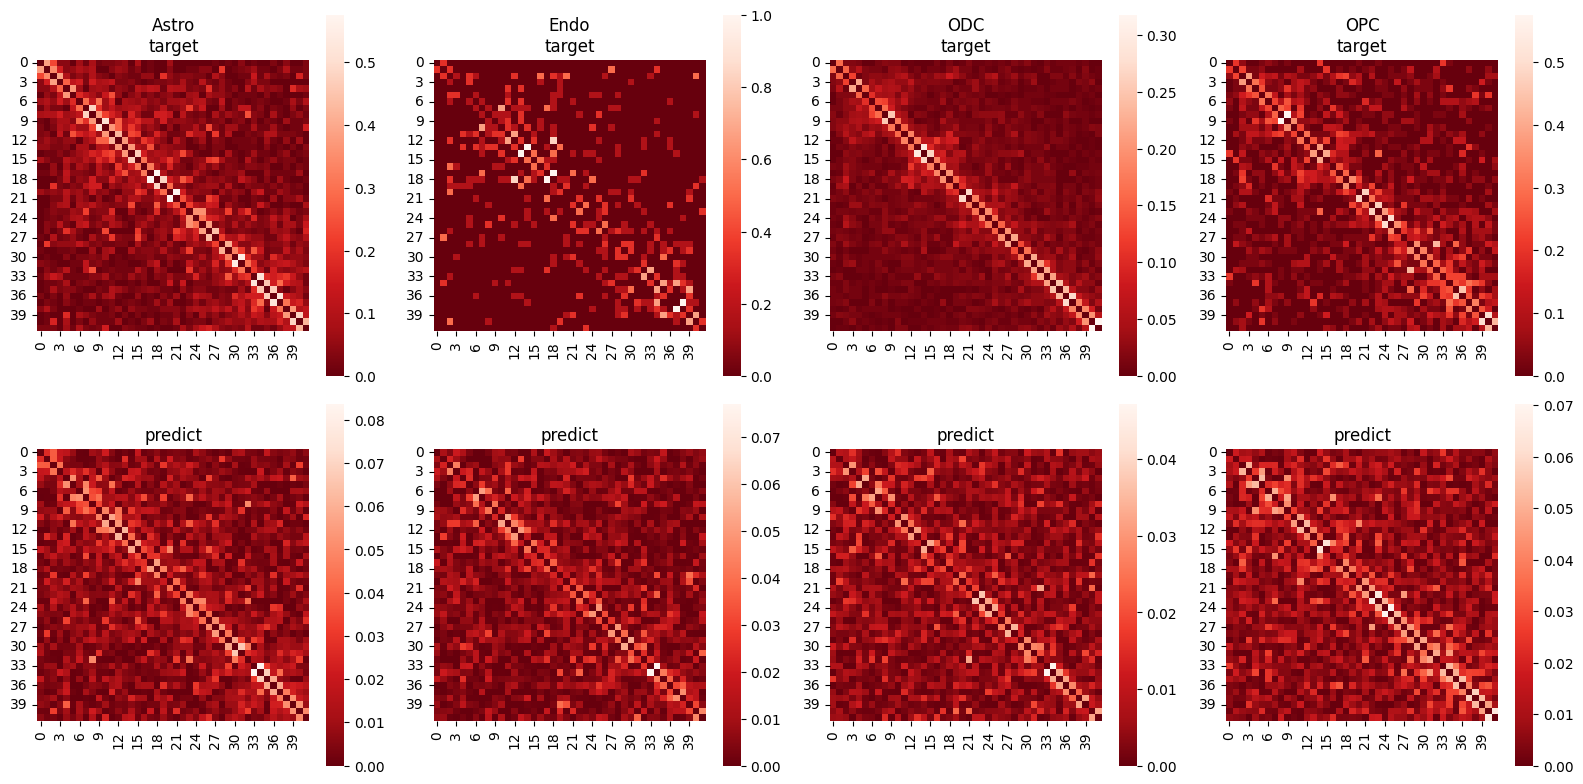

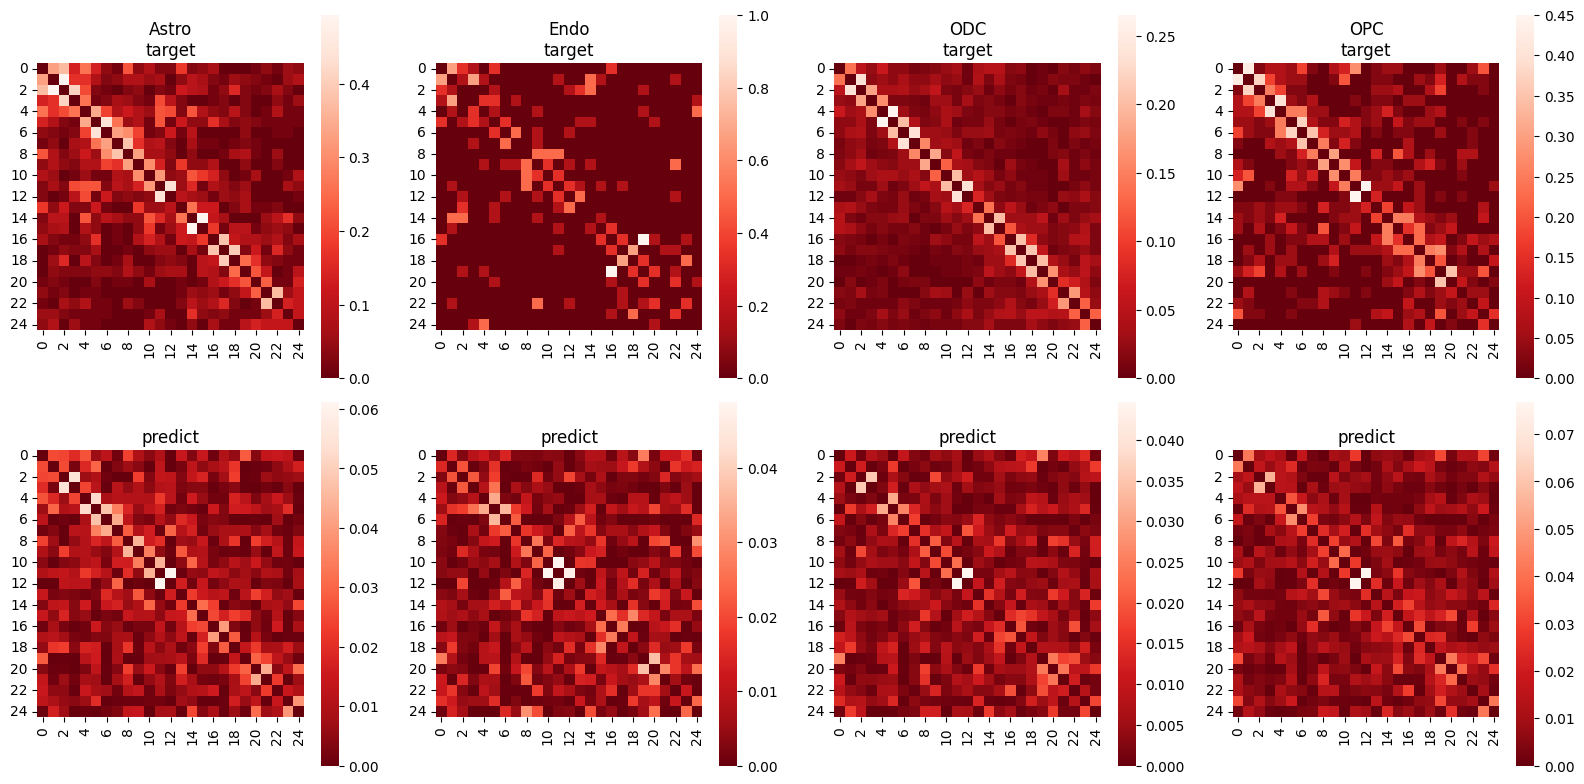

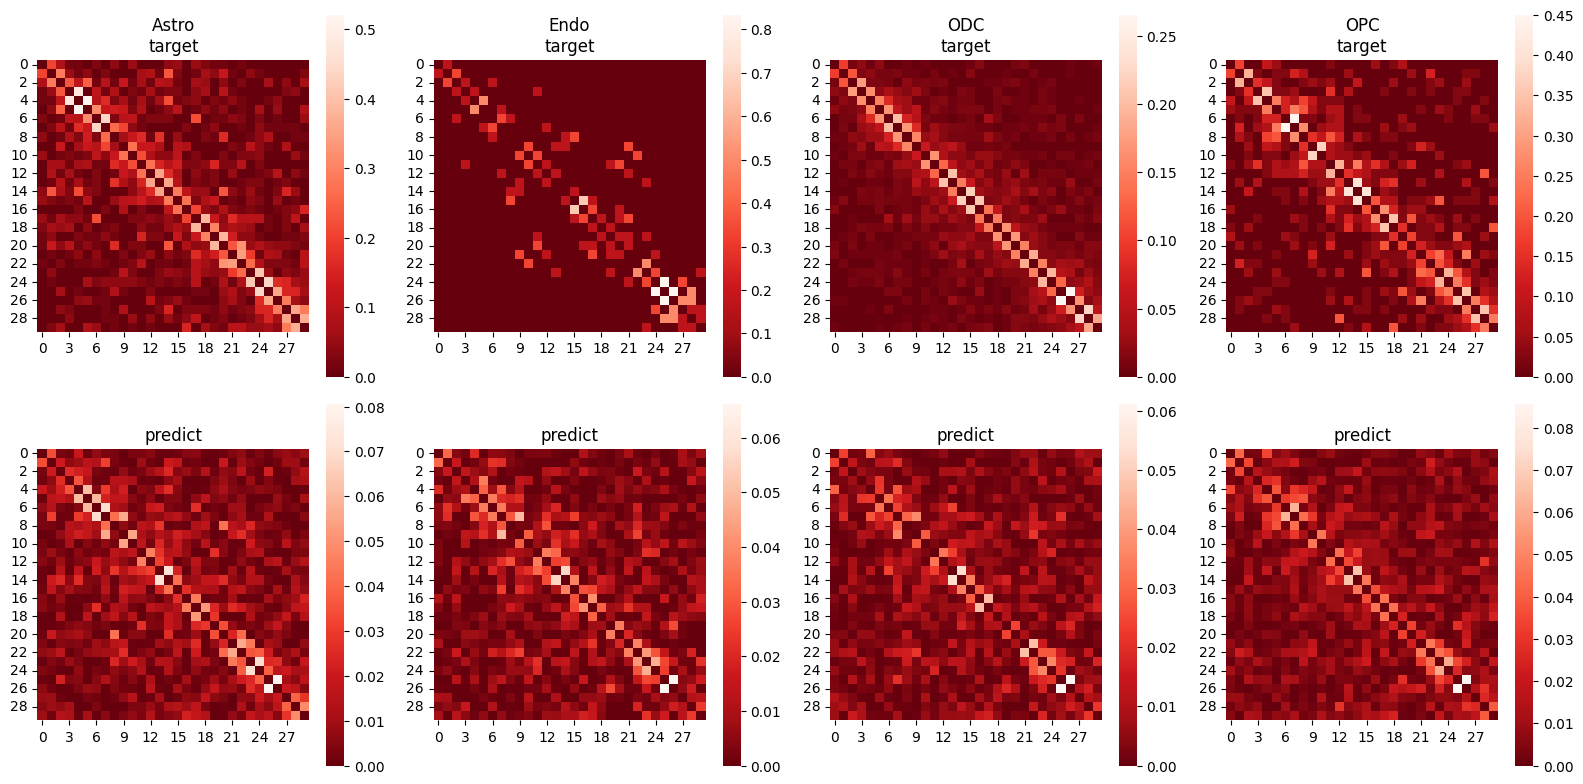

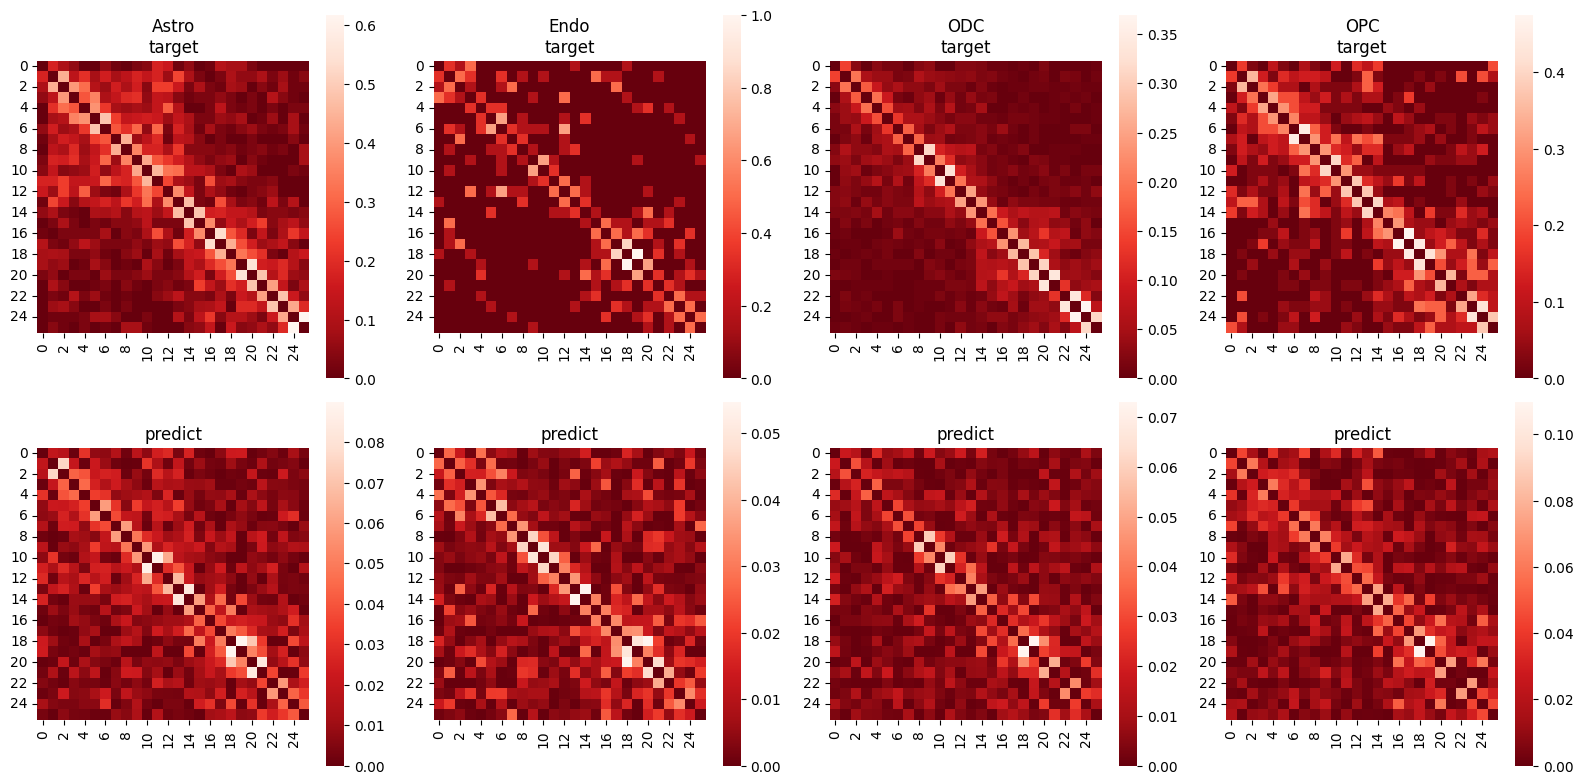

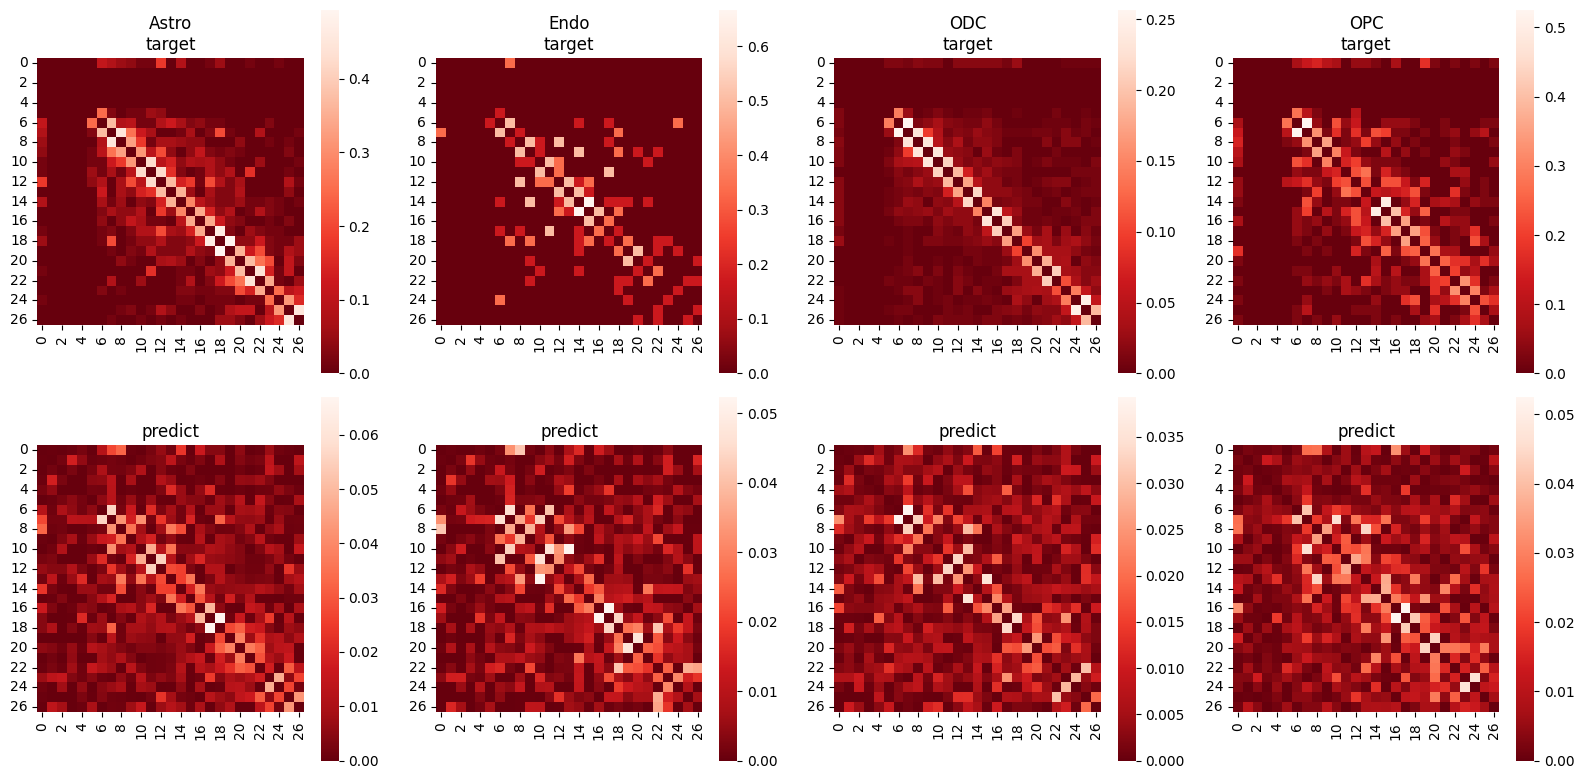

In [7]:
dir_path = "/data/liminghong/sclab/sclab/random_test/hk/tmp"
eval_set = np.load('/data/liminghong/sclab/sclab/random_test/hk/eval_dataset.npy', allow_pickle=True)
result, pvalues = pd.DataFrame(), pd.DataFrame()
for root, dirs, files in os.walk(dir_path):
    for directory in dirs:
        preds = np.load(os.path.join(root, directory, "evaluate.npy"), allow_pickle=True)

        _mats = {}
        for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
            _pred, _target = show_by_cell_type(eval_set, preds, cell_type, directory)
            _pred, _target = array2mat(_pred), array2mat(_target)
            np.fill_diagonal(_pred, 0)
            np.fill_diagonal(_target, 0)

            _mats[cell_type] = {"target": _target, "predict": _pred}
        gene_name = v19_anno[(v19_anno["type"]=="gene")&(v19_anno["location"]==directory)]['gene_name'].item()
        _draw(_mats, "../docs/source/_static/genomewide_evaluations/housekeeping_gene/{}.png".format(gene_name))